# **Telco**

**Import Library**

In [ ]:
# !pip install pydantic-settings
# !pip install -U ydata-profiling

In [651]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## **Load Data**

In [652]:
file_path = "/kaggle/input/telco-customer-churn-ibm-dataset/Telco_customer_churn.xlsx"
df = pd.read_excel(file_path)

In [653]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices


## **EDA**

In [654]:
# from ydata_profiling import ProfileReport
# profile = ProfileReport(df, title="Pandas Profiling Report")
# profile.to_file("report.html")

## **Preprocessing**

* Check and handle null values
* Handle outliers
* Encoding
* Scaling
  

**Target Encoding**

**Formula**  <br>
EncodedValue = λ × CategoryMean + (1−λ) × GlobalMean

where λ depends on the number of samples in the category.

In [ ]:
def target_encode(df, category_col, target_col, alpha=5):
    """
    Apply smoothing to category encoding using pandas.

    Parameters:
    df (pd.DataFrame): DataFrame containing the categorical and target columns.
    category_col (str): Name of the categorical column.
    target_col (str): Name of the target column.
    alpha (int): Smoothing parameter (higher values give more weight to the category mean).

    Returns:
    pd.Series: Smoothed encoding values for each category.
    """
    category_stats = df.groupby(category_col)[target_col].agg(['count', 'mean'])
    global_mean = df[target_col].mean()

    lambda_val = category_stats['count'] / (category_stats['count'] + alpha)
    smoothed_values = lambda_val * category_stats['mean'] + (1 - lambda_val) * global_mean
    print(smoothed_values)

    return df[category_col].map(smoothed_values)

In [656]:
target_encode(df,'Online Backup','Churn Value')

Online Backup
No                     0.399071
No internet service    0.074675
Yes                    0.215418
dtype: float64


0       0.215418
1       0.399071
2       0.399071
3       0.399071
4       0.215418
          ...   
7038    0.074675
7039    0.399071
7040    0.215418
7041    0.399071
7042    0.399071
Name: Online Backup, Length: 7043, dtype: float64

In [657]:
df.shape

(7043, 33)

In [658]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [659]:
df['Country'].value_counts()

Country
United States    7043
Name: count, dtype: int64

In [660]:
df['State'].value_counts()

State
California    7043
Name: count, dtype: int64

In [661]:
df['City'].value_counts()

City
Los Angeles      305
San Diego        150
San Jose         112
Sacramento       108
San Francisco    104
                ... 
Forest Knolls      4
Cotati             4
Bodega Bay         4
Greenbrae          4
Boulder Creek      4
Name: count, Length: 1129, dtype: int64

In [662]:
df['Zip Code'].value_counts()

Zip Code
91950    5
91945    5
91941    5
91916    5
91913    5
        ..
94970    4
94941    4
94937    4
94901    4
95110    4
Name: count, Length: 1652, dtype: int64

In [663]:
df.groupby('City')['Churn Value'].value_counts()

City          Churn Value
Acampo        1              3
              0              1
Acton         0              4
Adelanto      0              4
              1              1
                            ..
Yucaipa       0              3
              1              1
Yucca Valley  0              5
Zenia         0              3
              1              1
Name: count, Length: 1950, dtype: int64

In [664]:
df.drop(['CustomerID','Country', 'State', 'City','Zip Code','Lat Long', 'Latitude', 'Longitude'],axis=1,inplace=True)

In [665]:
df.isnull().sum()

Count                   0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [666]:
df['Churn Reason'][0]

'Competitor made better offer'

In [667]:
df.dtypes

Count                  int64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Score            int64
CLTV                   int64
Churn Reason          object
dtype: object

**Extract Categorical and Numerical Columns**

In [668]:
cat_cols = []
num_cols = []
for col,dtyp in df.dtypes.items():
    if dtyp == 'object':
        cat_cols.append(col)
    else:
        num_cols.append(col)

In [669]:
cat_cols

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Total Charges',
 'Churn Label',
 'Churn Reason']

In [670]:
num_cols

['Count',
 'Tenure Months',
 'Monthly Charges',
 'Churn Value',
 'Churn Score',
 'CLTV']

### **Encode data**

In [671]:
cat_cols

['Gender',
 'Senior Citizen',
 'Partner',
 'Dependents',
 'Phone Service',
 'Multiple Lines',
 'Internet Service',
 'Online Security',
 'Online Backup',
 'Device Protection',
 'Tech Support',
 'Streaming TV',
 'Streaming Movies',
 'Contract',
 'Paperless Billing',
 'Payment Method',
 'Total Charges',
 'Churn Label',
 'Churn Reason']

In [672]:
df['Gender'].value_counts()

Gender
Male      3555
Female    3488
Name: count, dtype: int64

In [673]:
df.groupby('Gender')['Churn Value'].value_counts()

Gender  Churn Value
Female  0              2549
        1               939
Male    0              2625
        1               930
Name: count, dtype: int64

**From the above analysis we can say that there is not significant relation between churn and gender**

In [674]:
from sklearn.preprocessing import LabelEncoder

In [675]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])

In [676]:
df['Senior Citizen'].value_counts()

Senior Citizen
No     5901
Yes    1142
Name: count, dtype: int64

In [677]:
senior_citizen_churn = df.groupby('Senior Citizen')['Churn Label'].value_counts().reset_index()

In [678]:
senior_citizen_churn

,Senior Citizen,Churn Label,count
0,No,No,4508
1,No,Yes,1393
2,Yes,No,666
3,Yes,Yes,476


In [679]:
senior_citizen_churn['Percentage'] = senior_citizen_churn.groupby('Senior Citizen')['count'].transform(lambda x: (x / x.sum()) * 100)

In [680]:
senior_citizen_churn

,Senior Citizen,Churn Label,count,Percentage
0,No,No,4508,76.393832
1,No,Yes,1393,23.606168
2,Yes,No,666,58.318739
3,Yes,Yes,476,41.681261


**Here we can see that non senior citizen have more probability to stay** <br>
Means there is more chances of their score will be 0, so we can say that there is an statistical relationship between them. so we can use binary encoding.

In [681]:
df['Senior Citizen'] = df['Senior Citizen'].map({'No':0,'Yes':1})

In [682]:
df['Partner'].value_counts()

Partner
No     3641
Yes    3402
Name: count, dtype: int64

In [683]:
partner_churn = df.groupby('Partner')['Churn Value'].value_counts().reset_index()

In [684]:
partner_churn

,Partner,Churn Value,count
0,No,0,2441
1,No,1,1200
2,Yes,0,2733
3,Yes,1,669


In [685]:
partner_churn['%'] =  partner_churn.groupby('Partner')['count'].transform(lambda x : (x / x.sum()) * 100)

In [686]:
partner_churn

,Partner,Churn Value,count,%
0,No,0,2441,67.042021
1,No,1,1200,32.957979
2,Yes,0,2733,80.335097
3,Yes,1,669,19.664903


There is a slight difference we can see in the %, but that is not much significant. So we can use 

In [ ]:
df['Partner'].map({'No':1,'Yes':0})

0       1
1       1
2       1
3       0
4       1
       ..
7038    1
7039    0
7040    0
7041    0
7042    1
Name: Partner, Length: 7043, dtype: int64

In [688]:
df['Partner'] = df['Partner'].map({'Yes':1,'No':0})

In [689]:
df['Dependents'].value_counts()

Dependents
No     5416
Yes    1627
Name: count, dtype: int64

In [690]:
df.groupby('Dependents')['Churn Value'].value_counts()

Dependents  Churn Value
No          0              3653
            1              1763
Yes         0              1521
            1               106
Name: count, dtype: int64

In [691]:
dependents_churn = df.groupby('Dependents')['Churn Value'].value_counts().reset_index()

In [692]:
dependents_churn

,Dependents,Churn Value,count
0,No,0,3653
1,No,1,1763
2,Yes,0,1521
3,Yes,1,106


In [693]:
dependents_churn['%'] = dependents_churn.groupby('Dependents')['count'].transform(lambda x : (x/x.sum()) * 100)

In [694]:
dependents_churn

,Dependents,Churn Value,count,%
0,No,0,3653,67.448301
1,No,1,1763,32.551699
2,Yes,0,1521,93.484942
3,Yes,1,106,6.515058


In [695]:
df['Dependents'].value_counts()
df.groupby('Dependents')['Churn Value'].value_counts()
dependents_churn['%'] = dependents_churn.groupby('Dependents')['count'].transform(lambda x : (x/x.sum()) * 100)

In [696]:
from scipy.stats import chi2_contingency

In [697]:
contingency_table = pd.crosstab(df['Dependents'], df['Churn Value'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("p-value:", p)

if p < 0.05:
    print("There is a significant association between Dependents and Churn Value.")
else:
    print("There is no significant relationship between Dependents and Churn Value.")


p-value: 2.5009723998553557e-96
There is a significant association between Dependents and Churn Value.


In [698]:
df['Dependents'] = target_encode(df,'Dependents','Churn Value')

Dependents
No     0.325462
Yes    0.065764
dtype: float64


In [699]:
df.drop('Dependents',axis=1,inplace=True)

In [700]:
df['Phone Service'].value_counts()

Phone Service
Yes    6361
No      682
Name: count, dtype: int64

In [701]:
phone_service_churn = df.groupby('Phone Service')['Churn Value'].value_counts().reset_index()

In [702]:
phone_service_churn['%'] = phone_service_churn.groupby('Phone Service')['count'].transform(lambda x: (x/x.sum()) * 100)

In [703]:
phone_service_churn

,Phone Service,Churn Value,count,%
0,No,0,512,75.073314
1,No,1,170,24.926686
2,Yes,0,4662,73.290363
3,Yes,1,1699,26.709637


No significant difference

In [704]:
df['Phone Service'].map({'No':0,'Yes':1})

0       1
1       1
2       1
3       1
4       1
       ..
7038    1
7039    1
7040    1
7041    0
7042    1
Name: Phone Service, Length: 7043, dtype: int64

In [705]:
df['Phone Service'] = df['Phone Service'].map({'No':0,'Yes':1})

In [706]:
df.columns

Index(['Count', 'Gender', 'Senior Citizen', 'Partner', 'Tenure Months',
       'Phone Service', 'Multiple Lines', 'Internet Service',
       'Online Security', 'Online Backup', 'Device Protection', 'Tech Support',
       'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charges', 'Total Charges', 'Churn Label',
       'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [707]:
df['Multiple Lines'].value_counts()

Multiple Lines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [708]:
multiple_line_churn = df.groupby('Multiple Lines')['Churn Value'].value_counts().reset_index()

In [709]:
multiple_line_churn['%'] = multiple_line_churn.groupby('Multiple Lines')['count'].transform(lambda x : (x/x.sum()) * 100)

In [710]:
multiple_line_churn

,Multiple Lines,Churn Value,count,%
0,No,0,2541,74.955752
1,No,1,849,25.044248
2,No phone service,0,512,75.073314
3,No phone service,1,170,24.926686
4,Yes,0,2121,71.390104
5,Yes,1,850,28.609896


Here also we can see no such differences, we can use one hot encoding here

In [711]:
pd.get_dummies(df['Multiple Lines'],dtype=int,drop_first=True)

,No phone service,Yes
0,0,0
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
7038,0,0
7039,0,1
7040,0,1
7041,1,0


In [712]:
multiple_lines_encoded = pd.get_dummies(df['Multiple Lines'],dtype=int,prefix="phone service")

In [713]:
multiple_lines_encoded

,phone service_No,phone service_No phone service,phone service_Yes
0,1,0,0
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
7038,1,0,0
7039,0,0,1
7040,0,0,1
7041,0,1,0


In [714]:
df = pd.concat([df,multiple_lines_encoded],axis=1)

In [715]:
df.drop('Multiple Lines',axis=1,inplace=True)

In [716]:
df.select_dtypes('object')

,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Label,Churn Reason
0,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,108.15,Yes,Competitor made better offer
1,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,151.65,Yes,Moved
2,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,820.5,Yes,Moved
3,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,3046.05,Yes,Moved
4,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),5036.3,Yes,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),1419.4,No,NaN
7039,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,1990.5,No,NaN
7040,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),7362.9,No,NaN
7041,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,346.45,No,NaN


In [717]:
df['Internet Service'].value_counts()

Internet Service
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

In [718]:
df.groupby('Internet Service')['Churn Value'].mean()

Internet Service
DSL            0.189591
Fiber optic    0.418928
No             0.074050
Name: Churn Value, dtype: float64

In [719]:
internet_churn = df.groupby('Internet Service')['Churn Value'].agg({'count','mean'})

In [720]:
internet_churn

,count,mean
Internet Service,,
DSL,2421,0.189591
Fiber optic,3096,0.418928
No,1526,0.074050


The above table count means the total no of that item and mean here is the no of churn(1) percentage.

In [721]:
internet_churn

,count,mean
Internet Service,,
DSL,2421,0.189591
Fiber optic,3096,0.418928
No,1526,0.074050


In [722]:
df['Internet Service'] = target_encode(df,'Internet Service','Churn Value')

Internet Service
DSL            0.189747
Fiber optic    0.418680
No             0.074675
dtype: float64


In [723]:
df['Online Security'].value_counts()

Online Security
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64

In [724]:
online_security_churn = df.groupby('Online Security')['Churn Value'].value_counts().reset_index()

We can see a perfect linear relationship between Online Security and Churn Value

In [725]:
online_security_churn

,Online Security,Churn Value,count
0,No,0,2037
1,No,1,1461
2,No internet service,0,1413
3,No internet service,1,113
4,Yes,0,1724
5,Yes,1,295


In [726]:
df.groupby('Online Security')['Churn Value'].mean()

Online Security
No                     0.417667
No internet service    0.074050
Yes                    0.146112
Name: Churn Value, dtype: float64

In [727]:
df['Online Security'] = target_encode(df,'Online Security','Churn Value')

Online Security
No                     0.417450
No internet service    0.074675
Yes                    0.146407
dtype: float64


In [728]:
df['Online Backup'].value_counts()

Online Backup
No                     3088
Yes                    2429
No internet service    1526
Name: count, dtype: int64

In [729]:
df.groupby('Online Backup')['Churn Value'].value_counts().reset_index()

,Online Backup,Churn Value,count
0,No,0,1855
1,No,1,1233
2,No internet service,0,1413
3,No internet service,1,113
4,Yes,0,1906
5,Yes,1,523


Here also we can use target encoding

In [730]:
df['Online Backup'] = target_encode(df,'Online Backup','Churn Value')

Online Backup
No                     0.399071
No internet service    0.074675
Yes                    0.215418
dtype: float64


In [731]:
df['Device Protection'].value_counts()

Device Protection
No                     3095
Yes                    2422
No internet service    1526
Name: count, dtype: int64

In [732]:
df['Device Protection'] = target_encode(df,'Device Protection','Churn Value')

Device Protection
No                     0.391073
No internet service    0.074675
Yes                    0.225104
dtype: float64


In [733]:
df['Tech Support'].value_counts()

Tech Support
No                     3473
Yes                    2044
No internet service    1526
Name: count, dtype: int64

In [734]:
df['Tech Support'] = target_encode(df,'Tech Support','Churn Value')

Tech Support
No                     0.416138
No internet service    0.074675
Yes                    0.151941
dtype: float64


In [735]:
df['Streaming TV'].value_counts()

Streaming TV
No                     2810
Yes                    2707
No internet service    1526
Name: count, dtype: int64

In [736]:
df.groupby('Streaming TV')['Churn Value'].mean()

Streaming TV
No                     0.335231
No internet service    0.074050
Yes                    0.300702
Name: Churn Value, dtype: float64

In [737]:
df['Streaming TV'] = target_encode(df,'Streaming TV','Churn Value')

Streaming TV
No                     0.335107
No internet service    0.074675
Yes                    0.300637
dtype: float64


In [738]:
df.select_dtypes('object')

,Streaming Movies,Contract,Paperless Billing,Payment Method,Total Charges,Churn Label,Churn Reason
0,No,Month-to-month,Yes,Mailed check,108.15,Yes,Competitor made better offer
1,No,Month-to-month,Yes,Electronic check,151.65,Yes,Moved
2,Yes,Month-to-month,Yes,Electronic check,820.5,Yes,Moved
3,Yes,Month-to-month,Yes,Electronic check,3046.05,Yes,Moved
4,Yes,Month-to-month,Yes,Bank transfer (automatic),5036.3,Yes,Competitor had better devices
...,...,...,...,...,...,...,...
7038,No internet service,Two year,Yes,Bank transfer (automatic),1419.4,No,NaN
7039,Yes,One year,Yes,Mailed check,1990.5,No,NaN
7040,Yes,One year,Yes,Credit card (automatic),7362.9,No,NaN
7041,No,Month-to-month,Yes,Electronic check,346.45,No,NaN


In [739]:
df['Streaming Movies'].value_counts()

Streaming Movies
No                     2785
Yes                    2732
No internet service    1526
Name: count, dtype: int64

In [740]:
df.groupby('Streaming Movies')['Churn Value'].value_counts()

Streaming Movies     Churn Value
No                   0              1847
                     1               938
No internet service  0              1413
                     1               113
Yes                  0              1914
                     1               818
Name: count, dtype: int64

In [741]:
df['Streaming Movies'] = target_encode(df,'Streaming Movies','Churn Value')

Streaming Movies
No                     0.336676
No internet service    0.074675
Yes                    0.299352
dtype: float64


In [742]:
df['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

In [743]:
df.groupby('Contract')['Churn Value'].value_counts()

Contract        Churn Value
Month-to-month  0              2220
                1              1655
One year        0              1307
                1               166
Two year        0              1647
                1                48
Name: count, dtype: int64

In [744]:
df['Contract'] = target_encode(df,'Contract','Churn Value')

Contract
Month-to-month    0.426888
One year          0.113212
Two year          0.029016
dtype: float64


In [745]:
df['Paperless Billing'].value_counts()

Paperless Billing
Yes    4171
No     2872
Name: count, dtype: int64

In [746]:
df.groupby('Paperless Billing')['Churn Value'].value_counts()

Paperless Billing  Churn Value
No                 0              2403
                   1               469
Yes                0              2771
                   1              1400
Name: count, dtype: int64

In [747]:
df.groupby('Paperless Billing')['Churn Value'].mean()

Paperless Billing
No     0.163301
Yes    0.335651
Name: Churn Value, dtype: float64

In [748]:
df['Paperless Billing'] = df['Paperless Billing'].map({'No':0,'Yes':1})

In [749]:
df['Payment Method'].value_counts()

Payment Method
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [750]:
df.groupby('Payment Method')['Churn Value'].value_counts()

Payment Method             Churn Value
Bank transfer (automatic)  0              1286
                           1               258
Credit card (automatic)    0              1290
                           1               232
Electronic check           0              1294
                           1              1071
Mailed check               0              1304
                           1               308
Name: count, dtype: int64

In [751]:
df.groupby('Payment Method')['Churn Value'].mean()

Payment Method
Bank transfer (automatic)    0.167098
Credit card (automatic)      0.152431
Electronic check             0.452854
Mailed check                 0.191067
Name: Churn Value, dtype: float64

In [752]:
df['Payment Method'] = target_encode(df,'Payment Method','Churn Value')

Payment Method
Bank transfer (automatic)    0.167416
Credit card (automatic)      0.152801
Electronic check             0.452459
Mailed check                 0.191297
dtype: float64


In [753]:
df['Total Charges'].value_counts()

Total Charges
20.2       11
           11
19.75       9
20.05       8
19.65       8
           ..
394.1       1
7589.8      1
905.55      1
2854.95     1
352.65      1
Name: count, Length: 6531, dtype: int64

In [754]:
df['Total Charges']

0        108.15
1        151.65
2         820.5
3       3046.05
4        5036.3
         ...   
7038     1419.4
7039     1990.5
7040     7362.9
7041     346.45
7042     6844.5
Name: Total Charges, Length: 7043, dtype: object

In [755]:
mask = df['Total Charges'].apply(lambda x: not isinstance(x, (int,float)))
null_rows = df[mask]
not_null_rows = df[~mask]

In [756]:
null_rows

,Count,Gender,Senior Citizen,Partner,Tenure Months,Phone Service,Internet Service,Online Security,Online Backup,Device Protection,...,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason,phone service_No,phone service_No phone service,phone service_Yes
2234,1,0,0,1,0,0,0.189747,0.146407,0.399071,0.225104,...,52.55,,No,0,36,2578,NaN,0,1,0
2438,1,1,0,0,0,1,0.074675,0.074675,0.074675,0.074675,...,20.25,,No,0,68,5504,NaN,1,0,0
2568,1,0,0,1,0,1,0.189747,0.146407,0.215418,0.225104,...,80.85,,No,0,45,2048,NaN,1,0,0
2667,1,1,0,1,0,1,0.074675,0.074675,0.074675,0.074675,...,25.75,,No,0,48,4950,NaN,0,0,1
2856,1,0,0,1,0,0,0.189747,0.146407,0.215418,0.225104,...,56.05,,No,0,30,4740,NaN,0,1,0
4331,1,1,0,1,0,1,0.074675,0.074675,0.074675,0.074675,...,19.85,,No,0,53,2019,NaN,1,0,0
4687,1,1,0,1,0,1,0.074675,0.074675,0.074675,0.074675,...,25.35,,No,0,49,2299,NaN,0,0,1
5104,1,0,0,1,0,1,0.074675,0.074675,0.074675,0.074675,...,20.00,,No,0,27,3763,NaN,1,0,0
5719,1,1,0,1,0,1,0.074675,0.074675,0.074675,0.074675,...,19.70,,No,0,69,4890,NaN,1,0,0
6772,1,0,0,1,0,1,0.189747,0.417450,0.215418,0.225104,...,73.35,,No,0,44,2342,NaN,0,0,1


In [757]:
not_null_rows['Total Charges'].mean()

2283.3004408418697

In [758]:
not_null_rows['Total Charges'].median()

1397.475

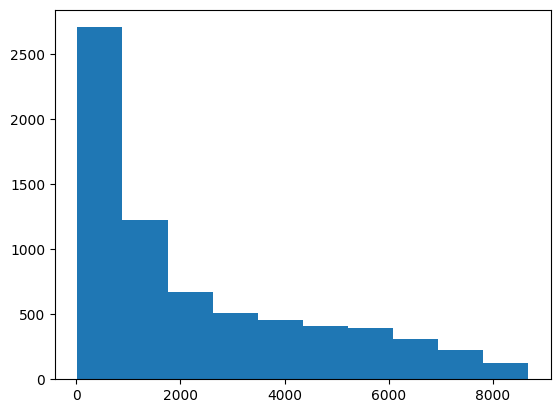

In [759]:
import matplotlib.pyplot as plt
plt.hist(not_null_rows['Total Charges'])
plt.show()

From this figure we can conclude that it is better to choose median, because data is not normally distributed and also right skewed

In [760]:
df['Total Charges']

0        108.15
1        151.65
2         820.5
3       3046.05
4        5036.3
         ...   
7038     1419.4
7039     1990.5
7040     7362.9
7041     346.45
7042     6844.5
Name: Total Charges, Length: 7043, dtype: object

In [761]:
df.loc[null_rows.index,'Total Charges']

2234     
2438     
2568     
2667     
2856     
4331     
4687     
5104     
5719     
6772     
6840     
Name: Total Charges, dtype: object

In [762]:
df.loc[null_rows.index,'Total Charges'] = not_null_rows['Total Charges'].median()

In [763]:
df.loc[null_rows.index,'Total Charges']

2234    1397.475
2438    1397.475
2568    1397.475
2667    1397.475
2856    1397.475
4331    1397.475
4687    1397.475
5104    1397.475
5719    1397.475
6772    1397.475
6840    1397.475
Name: Total Charges, dtype: object

In [764]:
df['Total Charges'] = df['Total Charges'].astype(float)

In [765]:
df.drop('Churn Label',axis=1,inplace=True)

In [766]:
df.select_dtypes('object')

,Churn Reason
0,Competitor made better offer
1,Moved
2,Moved
3,Moved
4,Competitor had better devices
...,...
7038,NaN
7039,NaN
7040,NaN
7041,NaN


In [767]:
import numpy as np

In [768]:
reason_cols = df[~df['Churn Reason'].isna()]
non_reason_cols = df[df['Churn Reason'].isna()]

In [769]:
non_reason_cols

,Count,Gender,Senior Citizen,Partner,Tenure Months,Phone Service,Internet Service,Online Security,Online Backup,Device Protection,...,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason,phone service_No,phone service_No phone service,phone service_Yes
1869,1,0,0,1,1,0,0.189747,0.417450,0.215418,0.391073,...,0.452459,29.85,29.85,0,27,3964,NaN,0,1,0
1870,1,1,0,0,34,1,0.189747,0.146407,0.399071,0.225104,...,0.191297,56.95,1889.50,0,61,3441,NaN,1,0,0
1871,1,1,0,0,45,0,0.189747,0.146407,0.399071,0.225104,...,0.167416,42.30,1840.75,0,66,4307,NaN,0,1,0
1872,1,1,0,0,22,1,0.418680,0.417450,0.215418,0.391073,...,0.152801,89.10,1949.40,0,43,4459,NaN,0,0,1
1873,1,0,0,0,10,0,0.189747,0.146407,0.399071,0.391073,...,0.191297,29.75,301.90,0,51,2013,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,0,0,72,1,0.074675,0.074675,0.074675,0.074675,...,0.167416,21.15,1419.40,0,45,5306,NaN,1,0,0
7039,1,1,0,1,24,1,0.189747,0.146407,0.399071,0.225104,...,0.191297,84.80,1990.50,0,59,2140,NaN,0,0,1
7040,1,0,0,1,72,1,0.418680,0.417450,0.215418,0.225104,...,0.152801,103.20,7362.90,0,71,5560,NaN,0,0,1
7041,1,0,0,1,11,0,0.189747,0.146407,0.399071,0.391073,...,0.452459,29.60,346.45,0,59,2793,NaN,0,1,0


In [770]:
reason_cols

,Count,Gender,Senior Citizen,Partner,Tenure Months,Phone Service,Internet Service,Online Security,Online Backup,Device Protection,...,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,Churn Reason,phone service_No,phone service_No phone service,phone service_Yes
0,1,1,0,0,2,1,0.189747,0.146407,0.215418,0.391073,...,0.191297,53.85,108.15,1,86,3239,Competitor made better offer,1,0,0
1,1,0,0,0,2,1,0.418680,0.417450,0.399071,0.391073,...,0.452459,70.70,151.65,1,67,2701,Moved,1,0,0
2,1,0,0,0,8,1,0.418680,0.417450,0.399071,0.225104,...,0.452459,99.65,820.50,1,86,5372,Moved,0,0,1
3,1,0,0,1,28,1,0.418680,0.417450,0.399071,0.225104,...,0.452459,104.80,3046.05,1,84,5003,Moved,0,0,1
4,1,1,0,0,49,1,0.418680,0.417450,0.215418,0.225104,...,0.167416,103.70,5036.30,1,89,5340,Competitor had better devices,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1,1,0,0,12,1,0.189747,0.417450,0.399071,0.391073,...,0.452459,59.80,727.80,1,69,4581,Competitor offered higher download speeds,1,0,0
1865,1,0,0,0,9,1,0.189747,0.417450,0.399071,0.391073,...,0.167416,44.20,403.35,1,87,2029,Competitor offered higher download speeds,1,0,0
1866,1,1,1,0,1,1,0.418680,0.417450,0.399071,0.391073,...,0.452459,75.75,75.75,1,97,5571,Competitor offered higher download speeds,0,0,1
1867,1,0,0,0,67,1,0.418680,0.146407,0.215418,0.225104,...,0.152801,102.95,6886.25,1,70,5620,Competitor offered more data,0,0,1


In [771]:
df['Churn Reason'].value_counts()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Attitude of service provider                 135
Competitor had better devices                130
Network reliability                          103
Product dissatisfaction                      102
Price too high                                98
Service dissatisfaction                       89
Lack of self-service on Website               88
Extra data charges                            57
Moved                                         53
Lack of affordable download/upload speed      44
Limited range of services                     44
Long distance charges                         44
Poor expertise of phone support               20
Poor expertise of online support              19
Deceased                                       6
Name: c

In [772]:
import re
from wordcloud import STOPWORDS

text = ' '.join(reason_cols['Churn Reason'].astype(str).tolist())

text = re.sub(r'[^A-Za-z\s]', '', text)

text = text.lower()

stopwords = set(STOPWORDS)
text = ' '.join(word for word in text.split() if word not in stopwords)

In [773]:
text[:1000]

'competitor made better offer moved moved moved competitor better devices competitor offered higher download speeds competitor offered data competitor made better offer competitor better devices competitor better devices competitor offered higher download speeds competitor offered higher download speeds competitor offered higher download speeds competitor offered data competitor offered data competitor offered data competitor made better offer competitor made better offer price high product dissatisfaction service dissatisfaction lack selfservice website network reliability limited range services lack affordable downloadupload speed long distance charges extra data charges price high product dissatisfaction service dissatisfaction lack selfservice website network reliability dont know dont know dont know poor expertise online support poor expertise phone support price high product dissatisfaction service dissatisfaction lack selfservice website network reliability limited range service

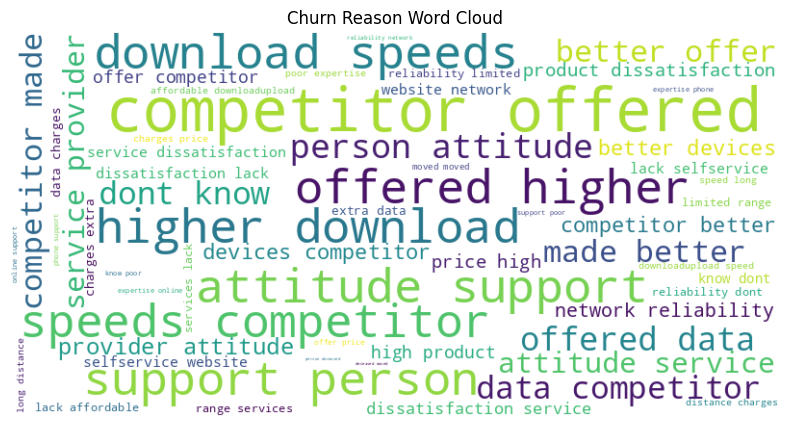

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Churn Reason Word Cloud")
plt.show()

Here we can understand that most of the customer churned due to competitor's offer or dissatisification with our service or attitude of assistant, also internet speed is an issue

In [775]:
df.columns

Index(['Count', 'Gender', 'Senior Citizen', 'Partner', 'Tenure Months',
       'Phone Service', 'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Value', 'Churn Score', 'CLTV', 'Churn Reason',
       'phone service_No', 'phone service_No phone service',
       'phone service_Yes'],
      dtype='object')

In [776]:
df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

In [777]:
reason_cols['Churn Reason']

0                    Competitor made better offer
1                                           Moved
2                                           Moved
3                                           Moved
4                   Competitor had better devices
                          ...                    
1864    Competitor offered higher download speeds
1865    Competitor offered higher download speeds
1866    Competitor offered higher download speeds
1867                 Competitor offered more data
1868                 Competitor offered more data
Name: Churn Reason, Length: 1869, dtype: object

In [778]:
max(reason_cols['Churn Reason'],key=len)

'Competitor offered higher download speeds'

In [779]:
min(reason_cols['Churn Reason'],key=len)

'Moved'

In [780]:
encoded_df = df.drop('Churn Reason',axis=1)

In [781]:
encoded_df.dtypes

Count                               int64
Gender                              int64
Senior Citizen                      int64
Partner                             int64
Tenure Months                       int64
Phone Service                       int64
Internet Service                  float64
Online Security                   float64
Online Backup                     float64
Device Protection                 float64
Tech Support                      float64
Streaming TV                      float64
Streaming Movies                  float64
Contract                          float64
Paperless Billing                   int64
Payment Method                    float64
Monthly Charges                   float64
Total Charges                     float64
Churn Value                         int64
Churn Score                         int64
CLTV                                int64
phone service_No                    int64
phone service_No phone service      int64
phone service_Yes                 

### **Scaling**

In [782]:
def hist_plot(col):
    plt.title(col)
    plt.hist(encoded_df[col])
    plt.show()
    display(encoded_df[col].value_counts())

In [783]:
encoded_df.head()

,Count,Gender,Senior Citizen,Partner,Tenure Months,Phone Service,Internet Service,Online Security,Online Backup,Device Protection,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,phone service_No,phone service_No phone service,phone service_Yes
0,1,1,0,0,2,1,0.189747,0.146407,0.215418,0.391073,...,1,0.191297,53.85,108.15,1,86,3239,1,0,0
1,1,0,0,0,2,1,0.418680,0.417450,0.399071,0.391073,...,1,0.452459,70.70,151.65,1,67,2701,1,0,0
2,1,0,0,0,8,1,0.418680,0.417450,0.399071,0.225104,...,1,0.452459,99.65,820.50,1,86,5372,0,0,1
3,1,0,0,1,28,1,0.418680,0.417450,0.399071,0.225104,...,1,0.452459,104.80,3046.05,1,84,5003,0,0,1
4,1,1,0,0,49,1,0.418680,0.417450,0.215418,0.225104,...,1,0.167416,103.70,5036.30,1,89,5340,0,0,1


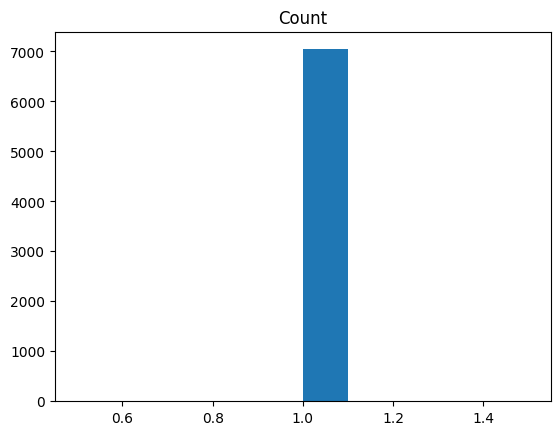

Count
1    7043
Name: count, dtype: int64

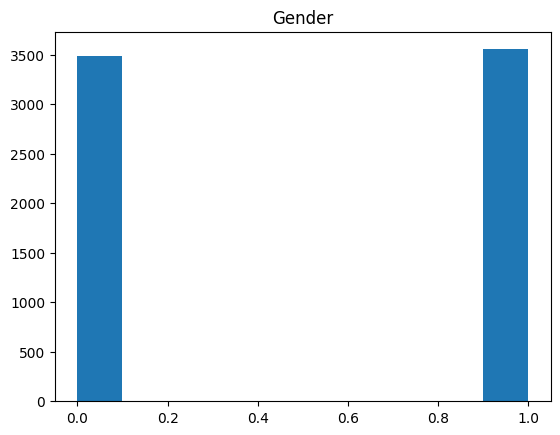

Gender
1    3555
0    3488
Name: count, dtype: int64

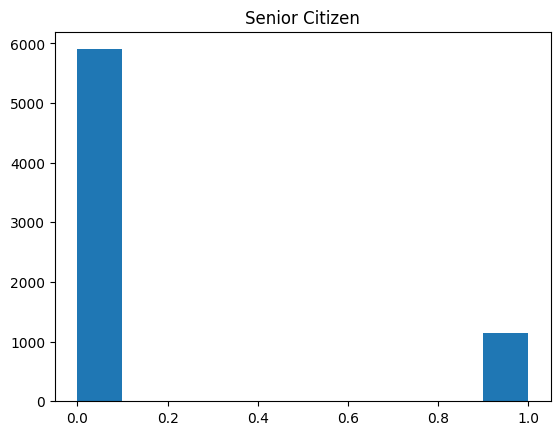

Senior Citizen
0    5901
1    1142
Name: count, dtype: int64

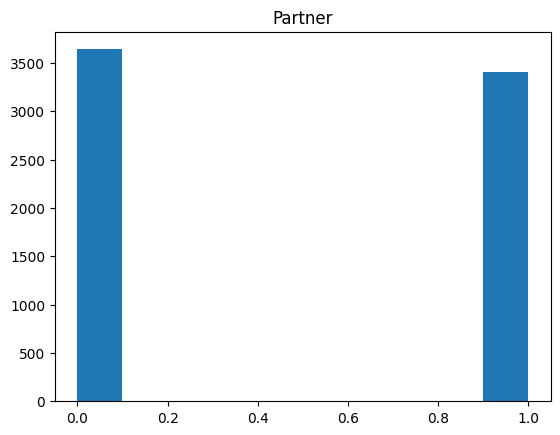

Partner
0    3641
1    3402
Name: count, dtype: int64

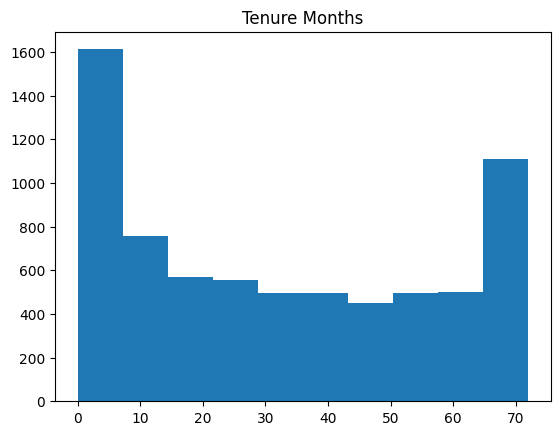

Tenure Months
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

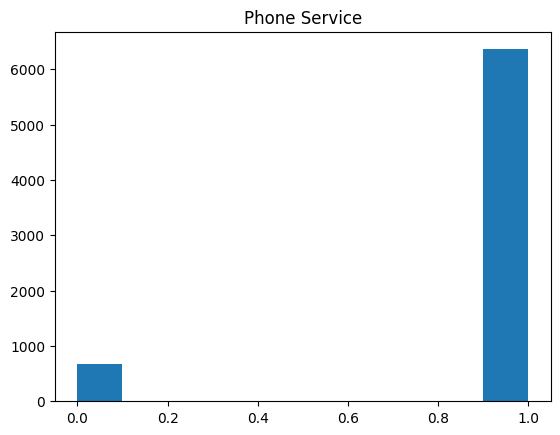

Phone Service
1    6361
0     682
Name: count, dtype: int64

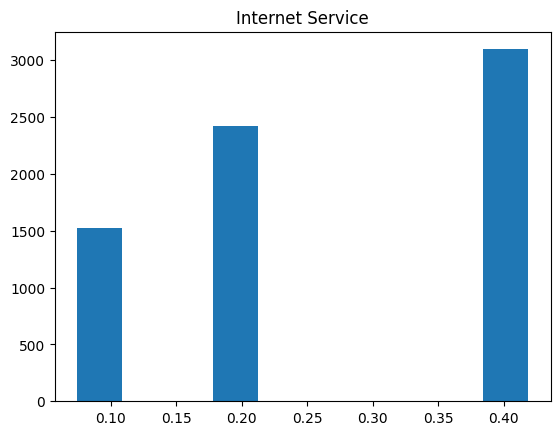

Internet Service
0.418680    3096
0.189747    2421
0.074675    1526
Name: count, dtype: int64

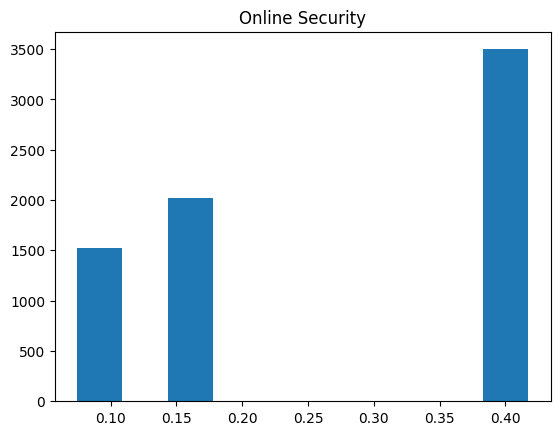

Online Security
0.417450    3498
0.146407    2019
0.074675    1526
Name: count, dtype: int64

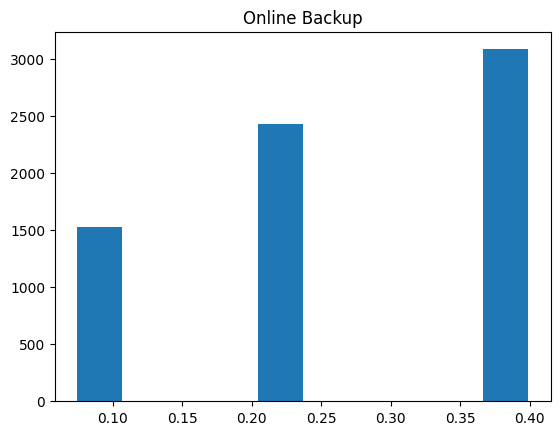

Online Backup
0.399071    3088
0.215418    2429
0.074675    1526
Name: count, dtype: int64

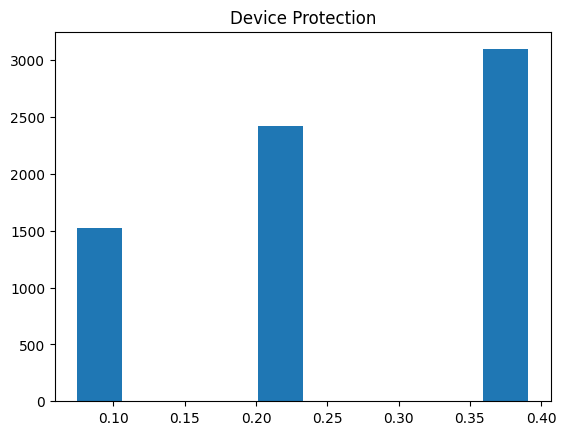

Device Protection
0.391073    3095
0.225104    2422
0.074675    1526
Name: count, dtype: int64

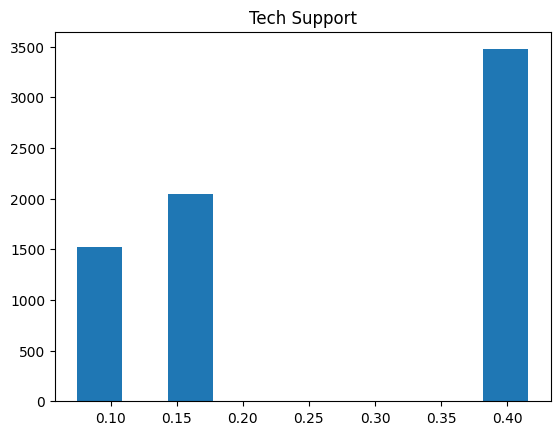

Tech Support
0.416138    3473
0.151941    2044
0.074675    1526
Name: count, dtype: int64

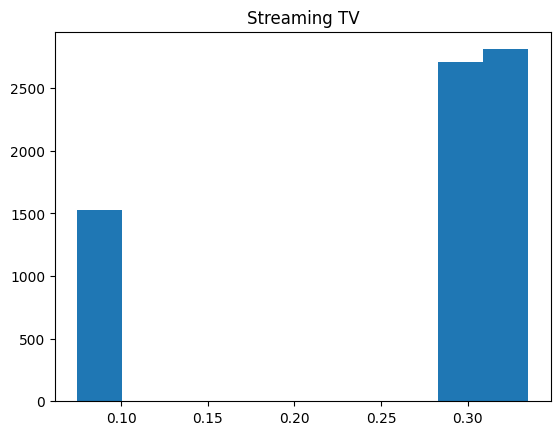

Streaming TV
0.335107    2810
0.300637    2707
0.074675    1526
Name: count, dtype: int64

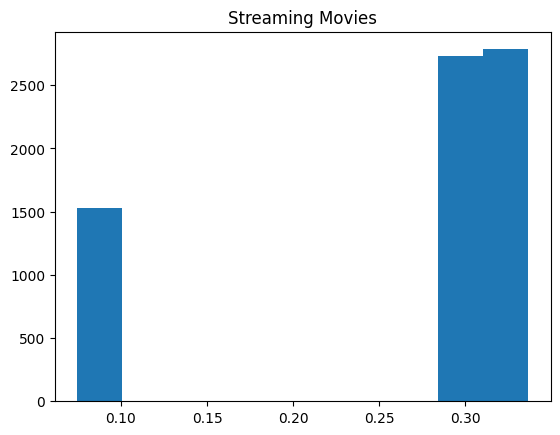

Streaming Movies
0.336676    2785
0.299352    2732
0.074675    1526
Name: count, dtype: int64

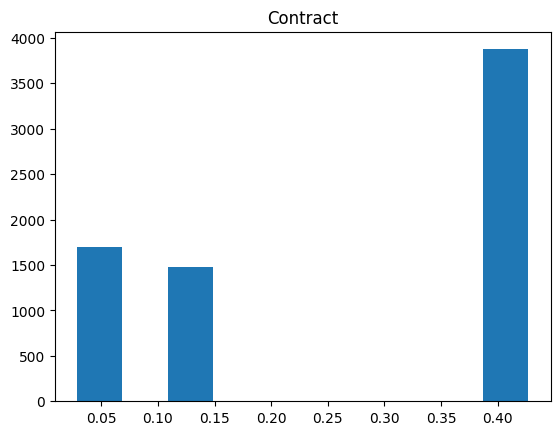

Contract
0.426888    3875
0.029016    1695
0.113212    1473
Name: count, dtype: int64

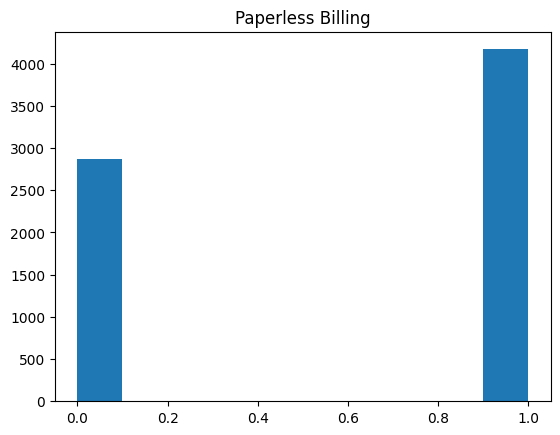

Paperless Billing
1    4171
0    2872
Name: count, dtype: int64

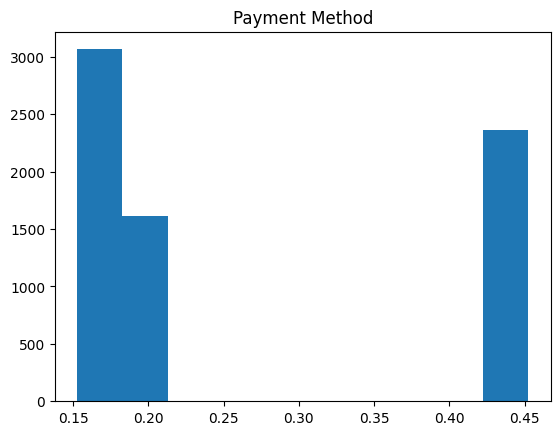

Payment Method
0.452459    2365
0.191297    1612
0.167416    1544
0.152801    1522
Name: count, dtype: int64

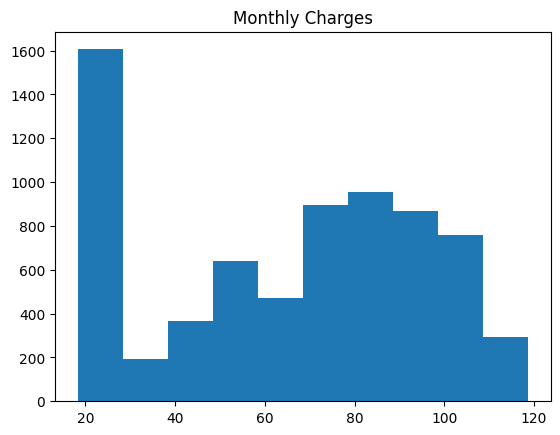

Monthly Charges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
81.60      1
91.60      1
112.75     1
34.85      1
61.75      1
Name: count, Length: 1585, dtype: int64

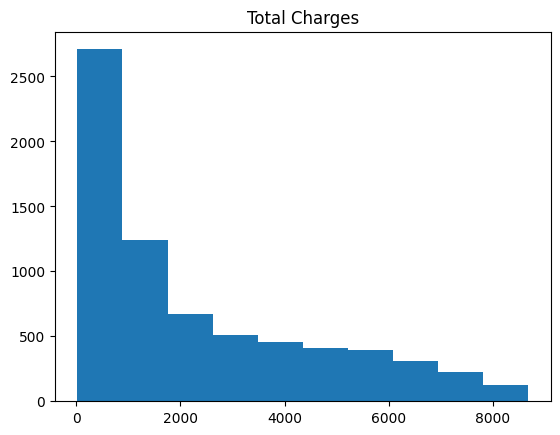

Total Charges
20.200      11
1397.475    11
19.750       9
20.050       8
19.650       8
            ..
394.100      1
7589.800     1
905.550      1
2854.950     1
352.650      1
Name: count, Length: 6531, dtype: int64

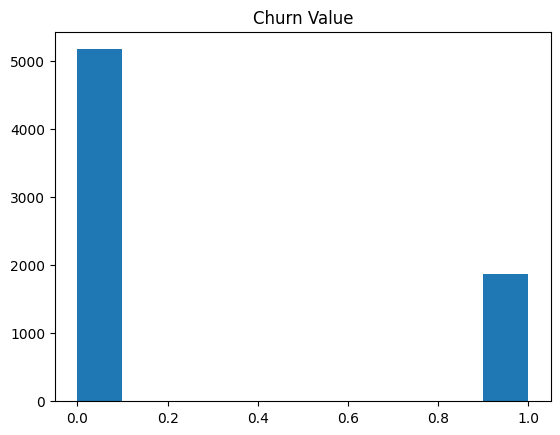

Churn Value
0    5174
1    1869
Name: count, dtype: int64

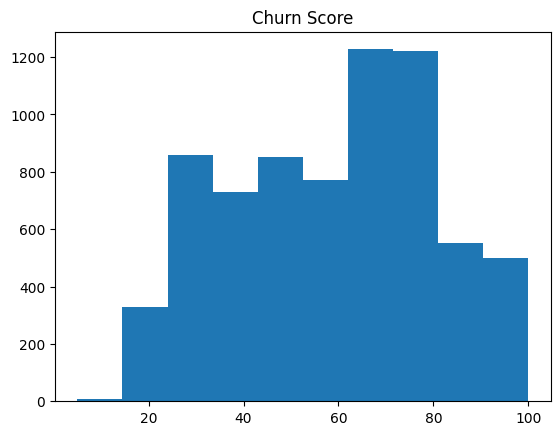

Churn Score
80    151
71    148
77    145
67    143
76    141
     ... 
88     33
9       3
8       2
7       2
5       1
Name: count, Length: 85, dtype: int64

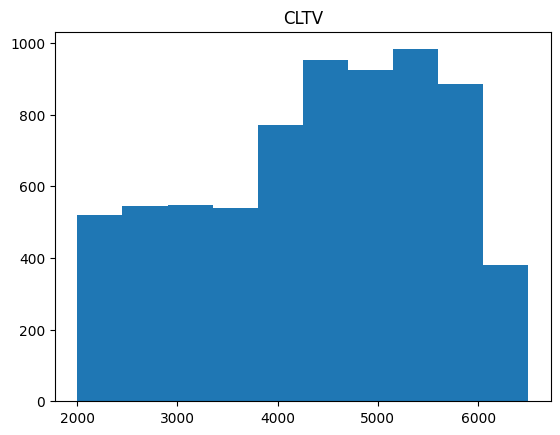

CLTV
5546    8
4745    7
2269    7
5461    7
4369    7
       ..
6409    1
2228    1
5108    1
6393    1
3921    1
Name: count, Length: 3438, dtype: int64

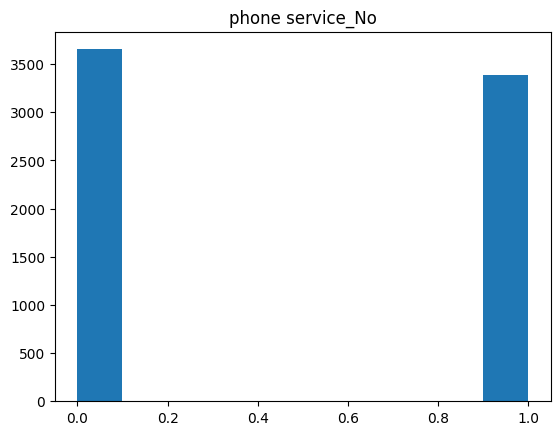

phone service_No
0    3653
1    3390
Name: count, dtype: int64

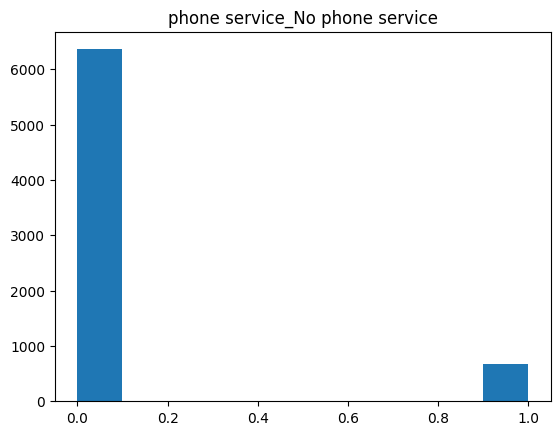

phone service_No phone service
0    6361
1     682
Name: count, dtype: int64

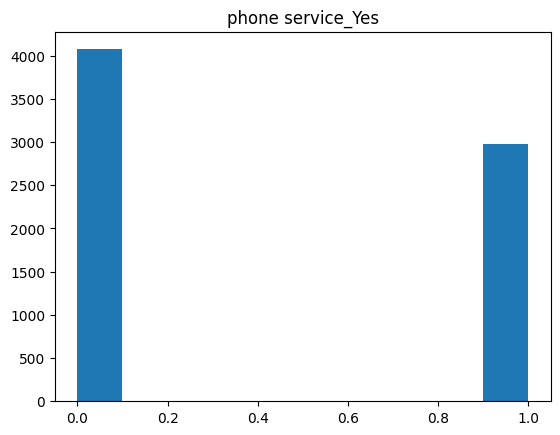

phone service_Yes
0    4072
1    2971
Name: count, dtype: int64

In [784]:
for col in encoded_df.columns:
    hist_plot(col)

In [785]:
scale_df_data = df[num_cols]

In [786]:
num_cols

['Count',
 'Tenure Months',
 'Monthly Charges',
 'Churn Value',
 'Churn Score',
 'CLTV']

In [787]:
scale_df_data

,Count,Tenure Months,Monthly Charges,Churn Value,Churn Score,CLTV
0,1,2,53.85,1,86,3239
1,1,2,70.70,1,67,2701
2,1,8,99.65,1,86,5372
3,1,28,104.80,1,84,5003
4,1,49,103.70,1,89,5340
...,...,...,...,...,...,...
7038,1,72,21.15,0,45,5306
7039,1,24,84.80,0,59,2140
7040,1,72,103.20,0,71,5560
7041,1,11,29.60,0,59,2793


In [788]:
scale_cols = ['Total Charges','Monthly Charges','CLTV']

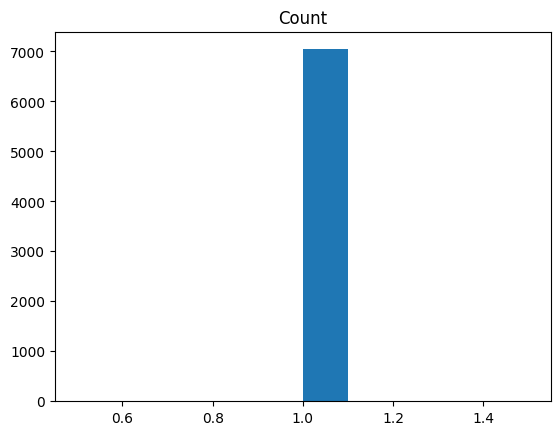

Count
1    7043
Name: count, dtype: int64

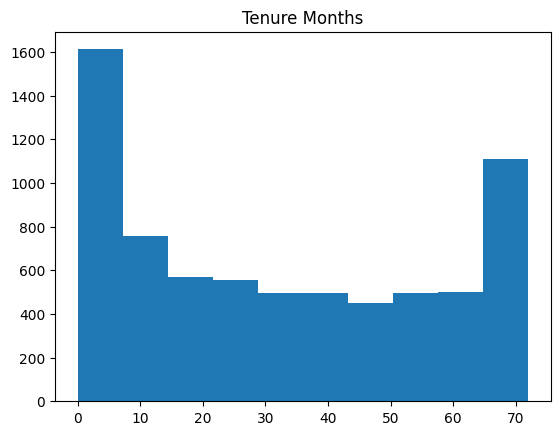

Tenure Months
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

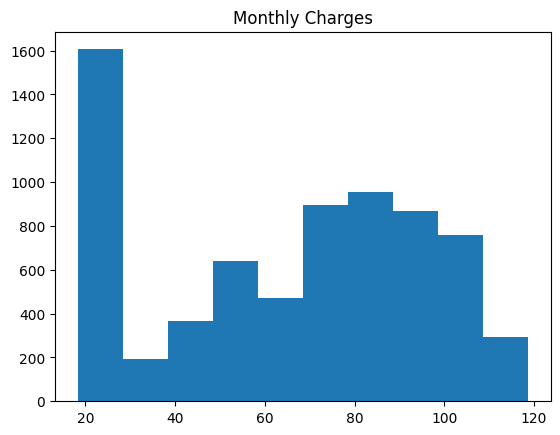

Monthly Charges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
81.60      1
91.60      1
112.75     1
34.85      1
61.75      1
Name: count, Length: 1585, dtype: int64

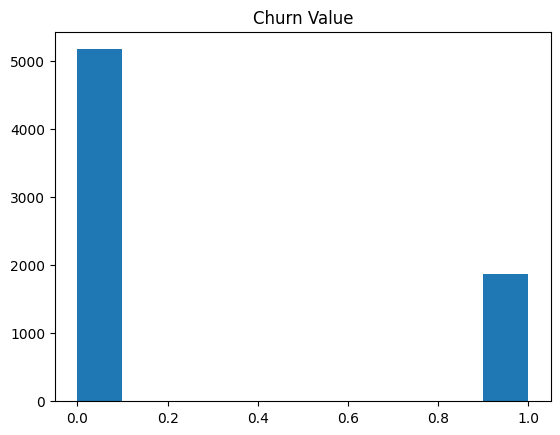

Churn Value
0    5174
1    1869
Name: count, dtype: int64

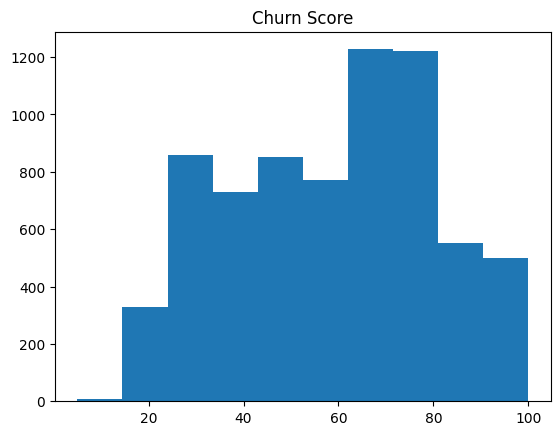

Churn Score
80    151
71    148
77    145
67    143
76    141
     ... 
88     33
9       3
8       2
7       2
5       1
Name: count, Length: 85, dtype: int64

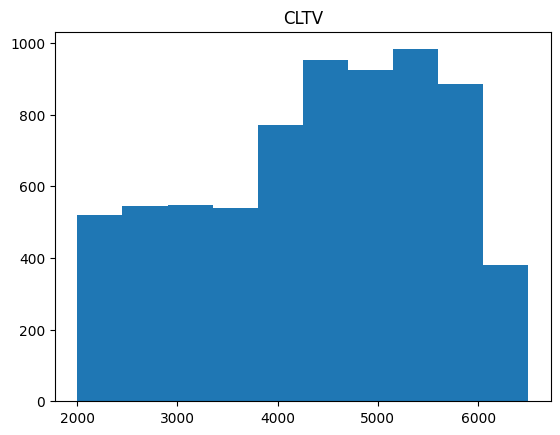

CLTV
5546    8
4745    7
2269    7
5461    7
4369    7
       ..
6409    1
2228    1
5108    1
6393    1
3921    1
Name: count, Length: 3438, dtype: int64

In [789]:
for col in scale_df_data.columns:
    hist_plot(col)

In [790]:
from sklearn.model_selection import train_test_split

In [791]:
encoded_df = encoded_df.drop('Count',axis=1)

In [792]:
encoded_df.corr()

,Gender,Senior Citizen,Partner,Tenure Months,Phone Service,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,...,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score,CLTV,phone service_No,phone service_No phone service,phone service_Yes
Gender,1.000000,-0.001874,-0.001808,0.005106,-0.006488,-0.011040,0.008071,0.003084,-0.004995,0.001701,...,-0.011754,0.001735,-0.014569,-0.000002,-0.008612,0.000311,-0.006851,0.004476,0.006488,-0.008414
Senior Citizen,-0.001874,1.000000,0.016479,0.016567,0.008576,0.265244,0.199570,0.144546,0.154292,0.218287,...,0.156530,0.162575,0.220173,0.102652,0.150889,0.102181,-0.003167,-0.136213,-0.008576,0.142948
Partner,-0.001808,0.016479,1.000000,0.379697,0.017706,0.000038,-0.115174,-0.096576,-0.098406,-0.095820,...,-0.014877,-0.095320,0.096848,0.318364,-0.150448,-0.111013,0.137859,-0.129929,-0.017706,0.142057
Tenure Months,0.005106,0.016567,0.379697,1.000000,0.008448,0.028812,-0.225999,-0.203726,-0.188205,-0.220971,...,0.006152,-0.237985,0.247900,0.825464,-0.352229,-0.224987,0.396406,-0.323088,-0.008448,0.331941
Phone Service,-0.006488,0.008576,0.017706,0.008448,1.000000,0.174508,-0.084503,-0.143281,-0.135721,-0.083891,...,0.016505,0.003183,0.247398,0.113013,0.011942,0.024136,0.023015,0.315431,-1.000000,0.279690
Internet Service,-0.011040,0.265244,0.000038,0.028812,0.174508,1.000000,0.582300,0.556988,0.572105,0.581671,...,0.368599,0.342279,0.884438,0.413871,0.322455,0.215511,0.012771,-0.255618,-0.174508,0.363119
Online Security,0.008071,0.199570,-0.115174,-0.225999,-0.084503,0.582300,1.000000,0.595986,0.606053,0.589891,...,0.299109,0.342328,0.467003,0.015716,0.347400,0.229623,-0.100171,-0.164388,0.084503,0.115716
Online Backup,0.003084,0.144546,-0.096576,-0.203726,-0.143281,0.556988,0.595986,1.000000,0.698630,0.606910,...,0.247278,0.284887,0.493026,0.043420,0.292315,0.182854,-0.082021,-0.165302,0.143281,0.081442
Device Protection,-0.004995,0.154292,-0.098406,-0.188205,-0.135721,0.572105,0.606053,0.698630,1.000000,0.640958,...,0.271417,0.290688,0.495693,0.061768,0.281580,0.187851,-0.064423,-0.172698,0.135721,0.093452
Tech Support,0.001701,0.218287,-0.095820,-0.220971,-0.083891,0.581671,0.589891,0.606910,0.640958,1.000000,...,0.268857,0.346012,0.442492,0.005768,0.342916,0.219901,-0.083831,-0.164552,0.083891,0.116248


In [793]:
import seaborn as sns

In [794]:
def heatmap_plot(col):
    plt.figure(figsize=(10, 8))
    data = encoded_df[[col,'Churn Value','Churn Score']].corr()
    sns.heatmap(data, annot=True, fmt=".2f", cmap="viridis")
    plt.title("Heatmap Example")
    plt.xlabel("Columns")
    plt.ylabel("Rows")
    plt.show()

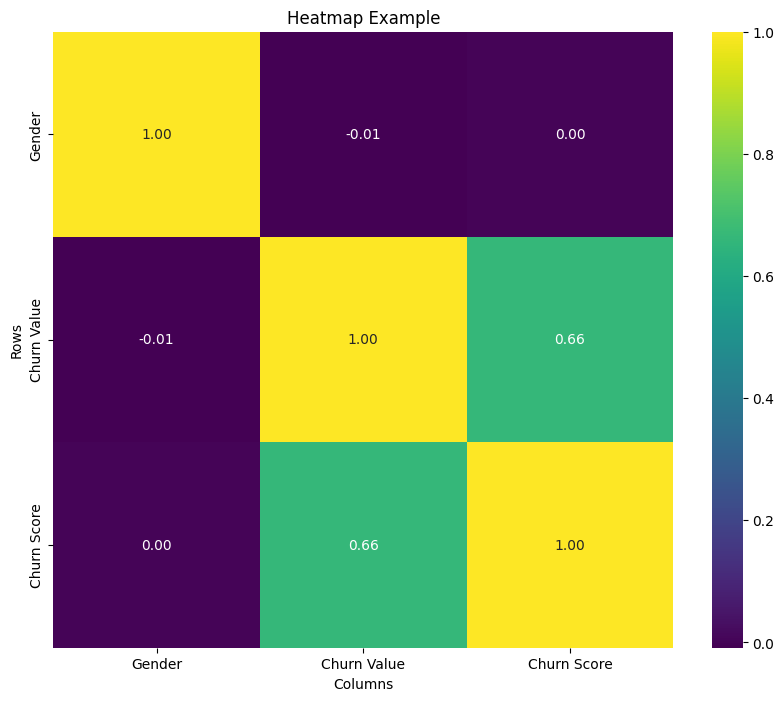

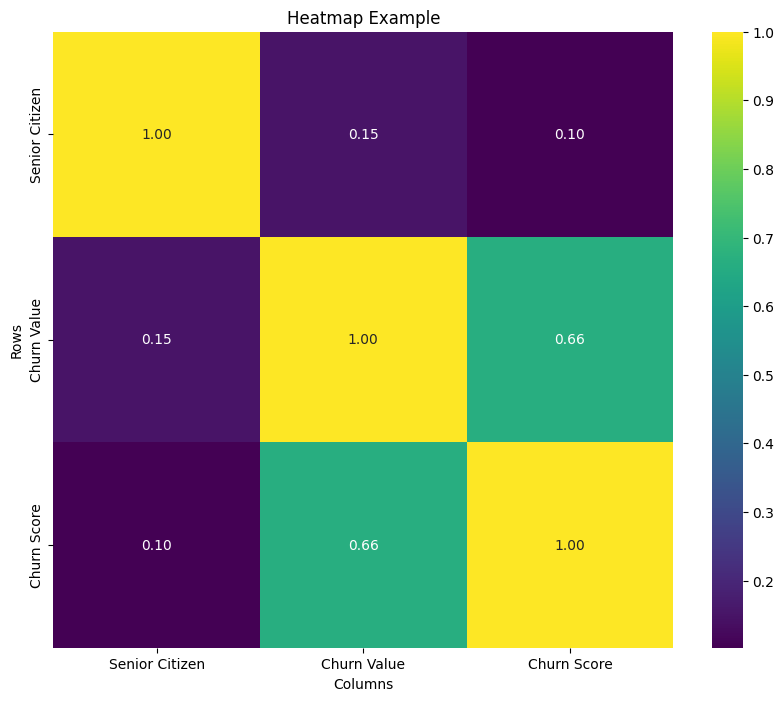

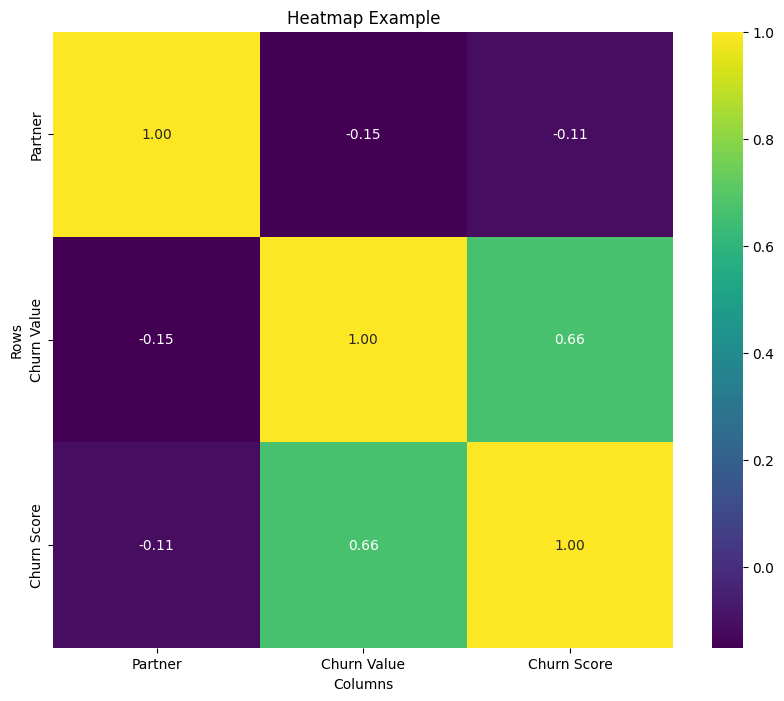

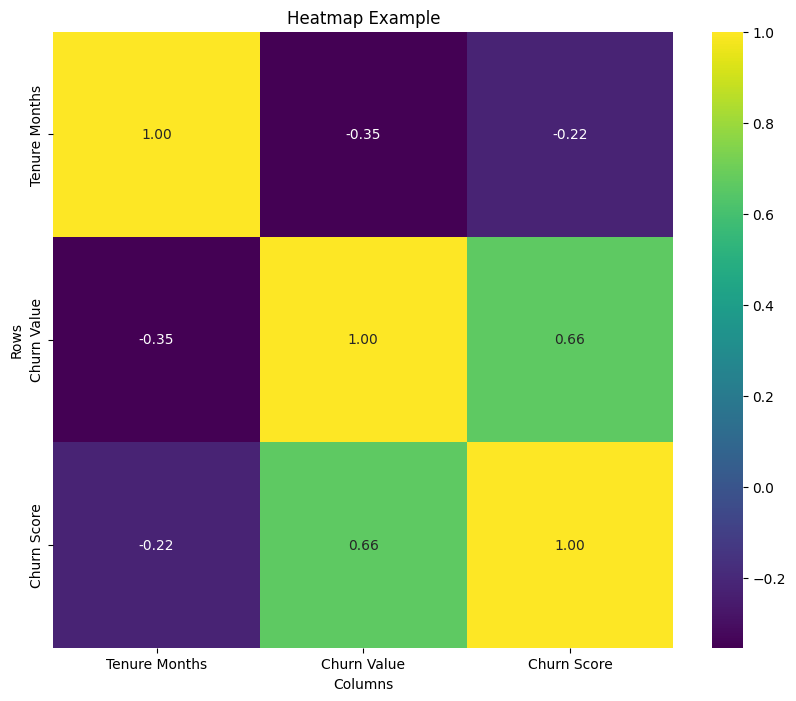

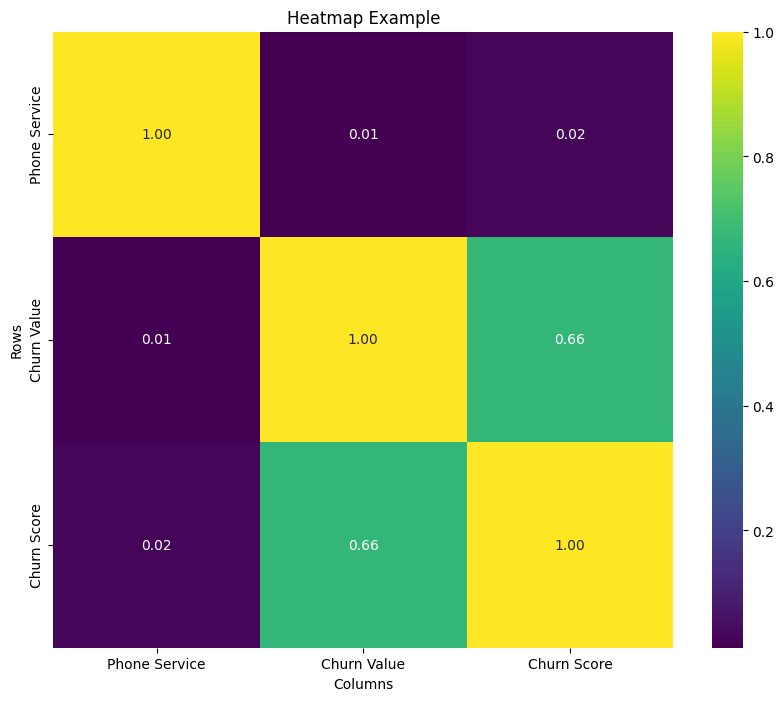

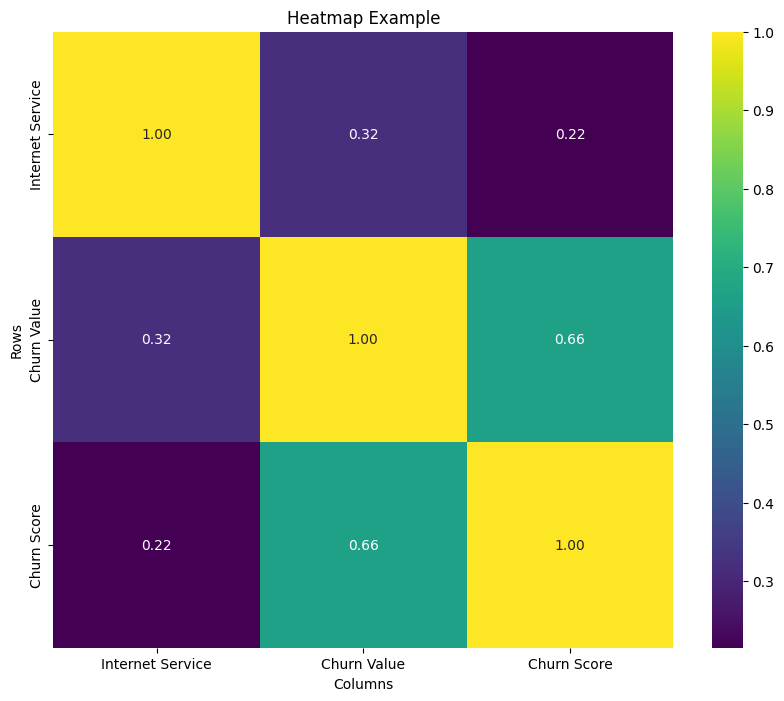

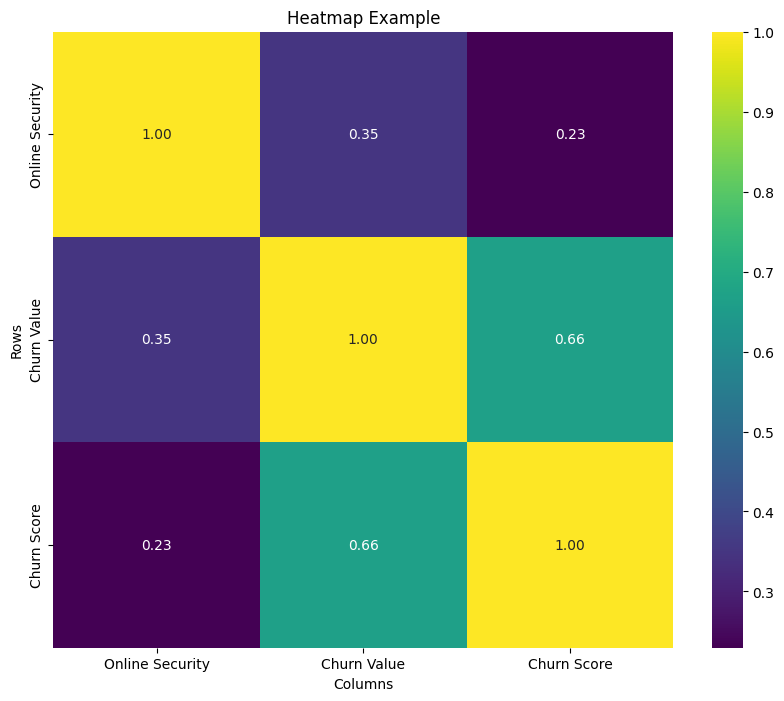

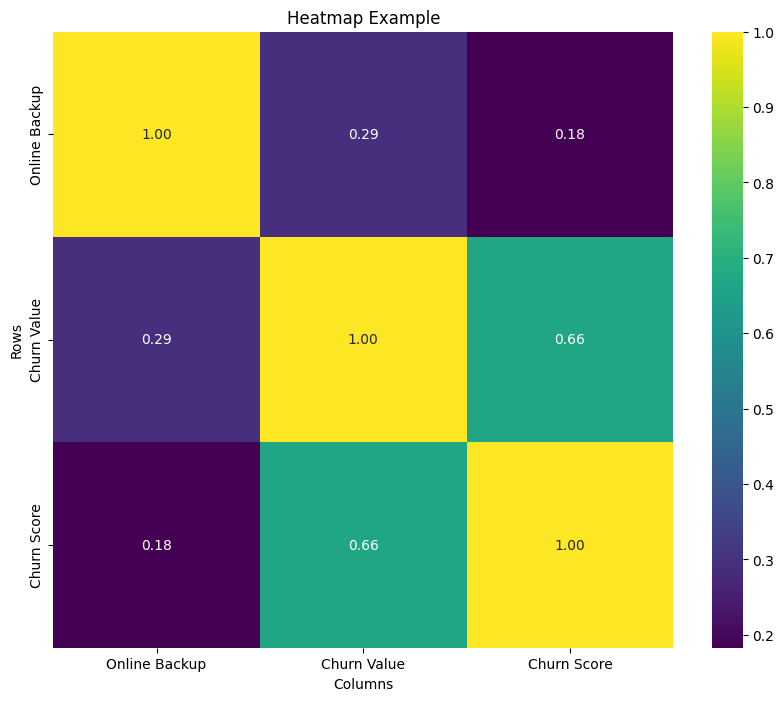

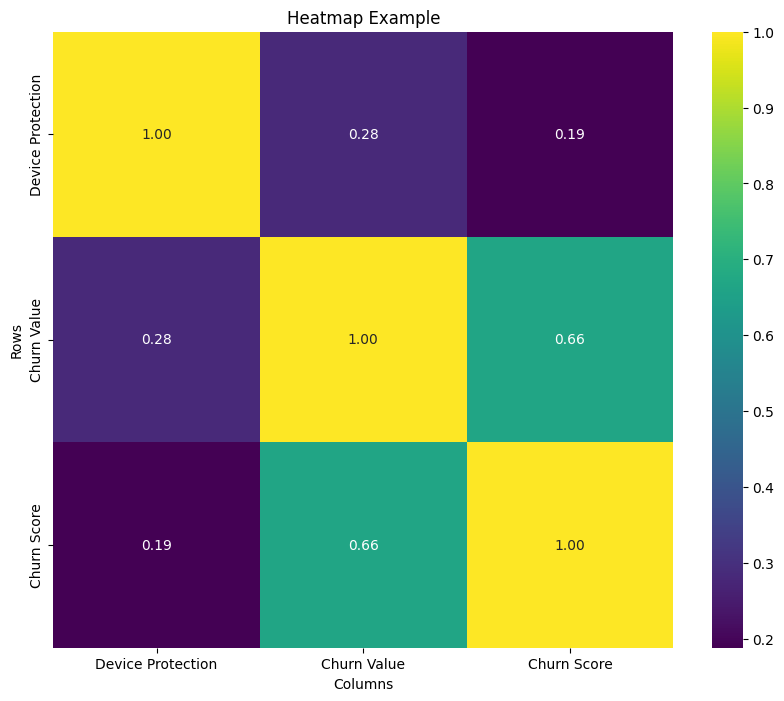

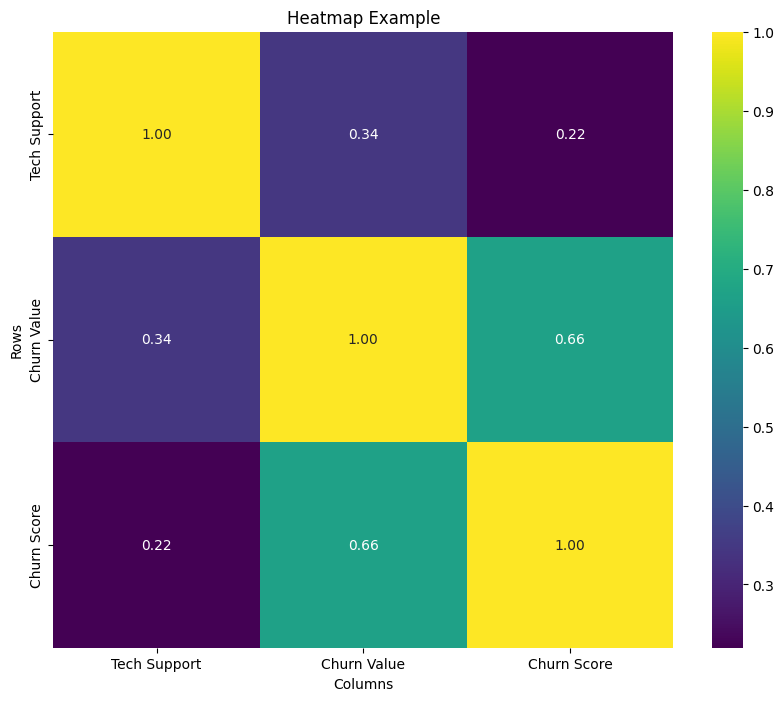

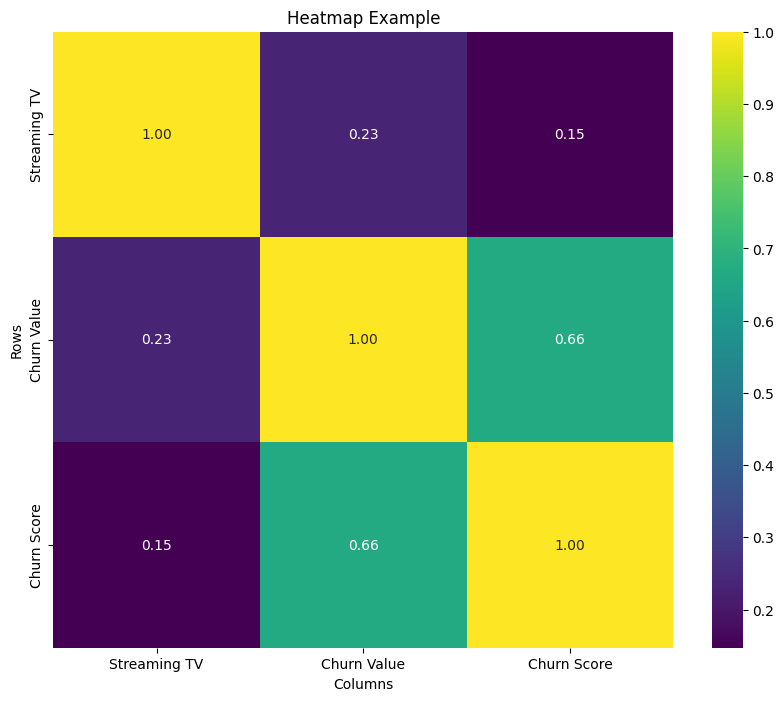

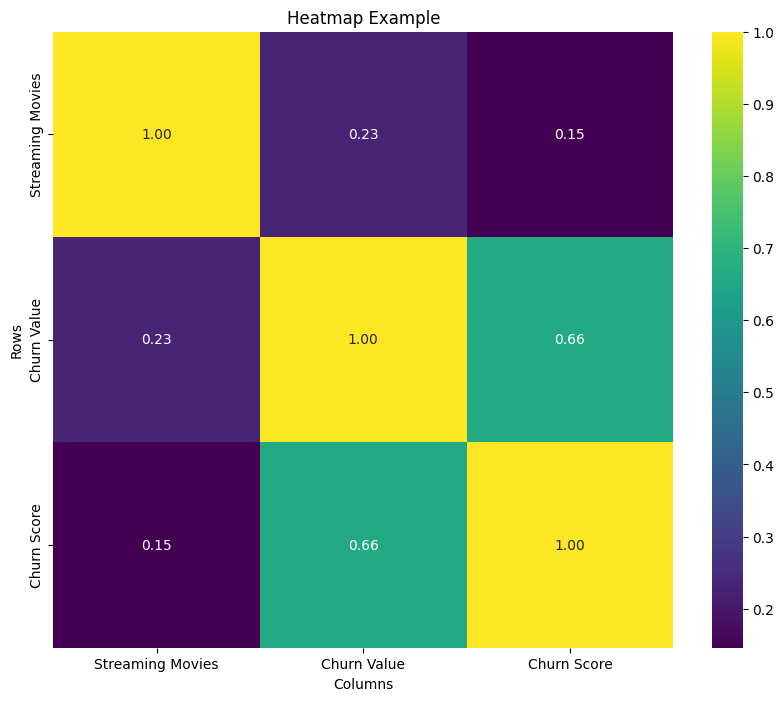

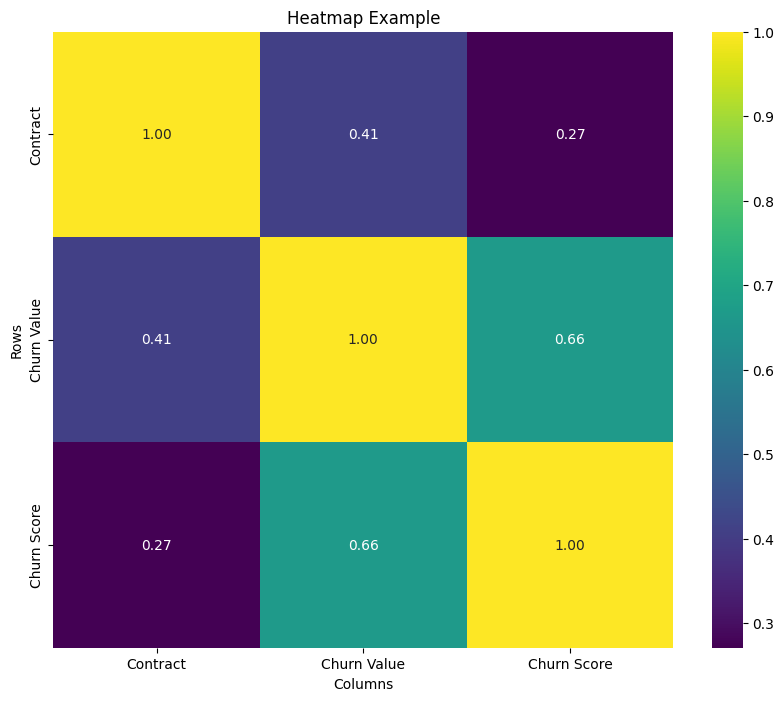

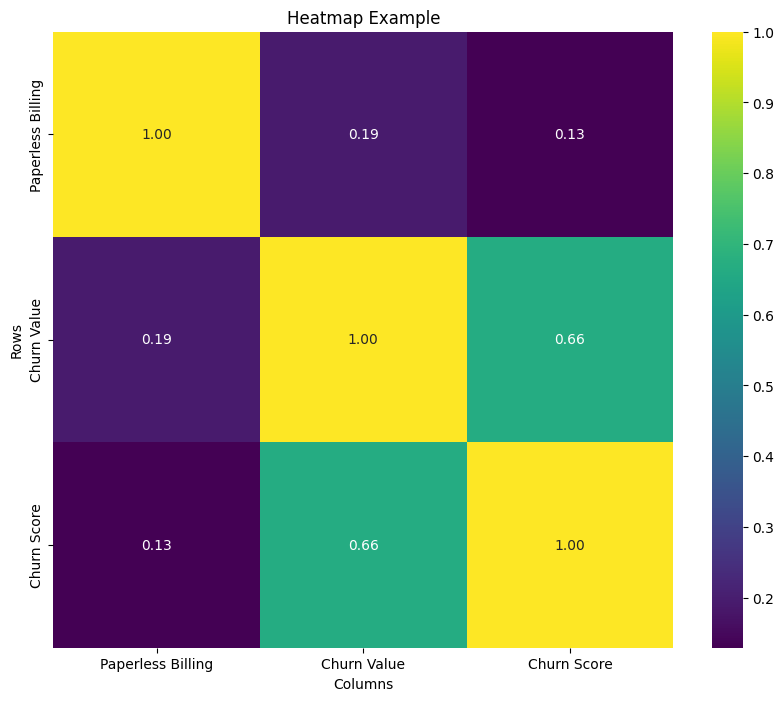

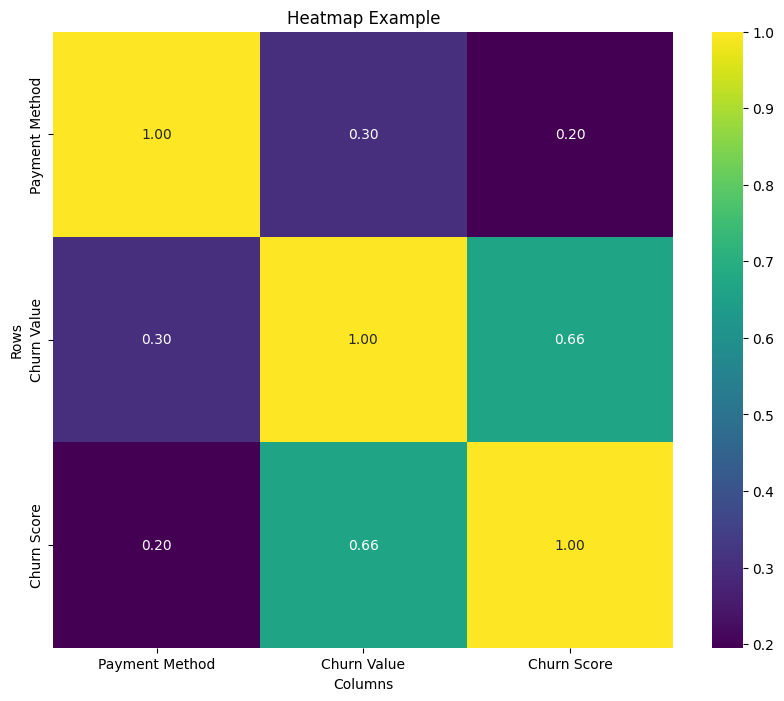

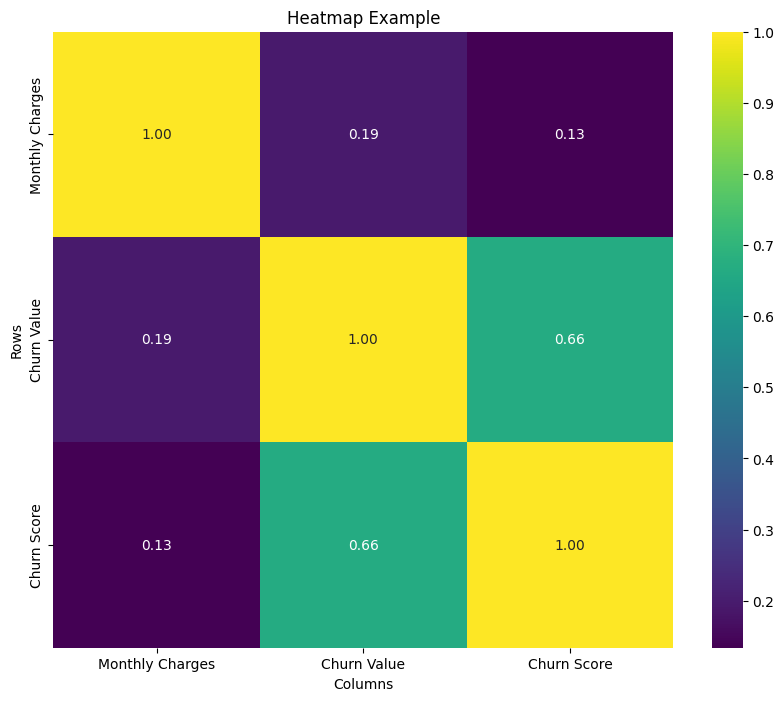

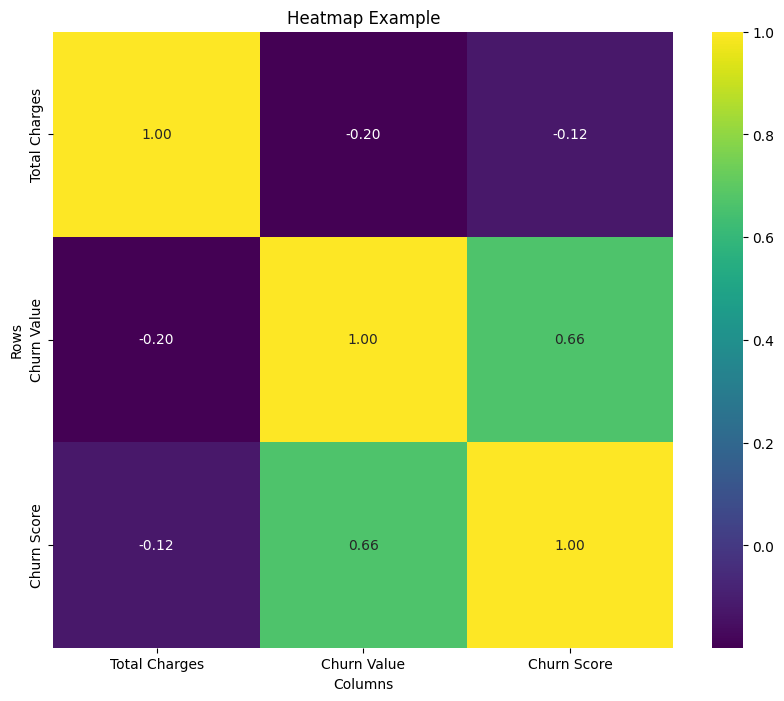

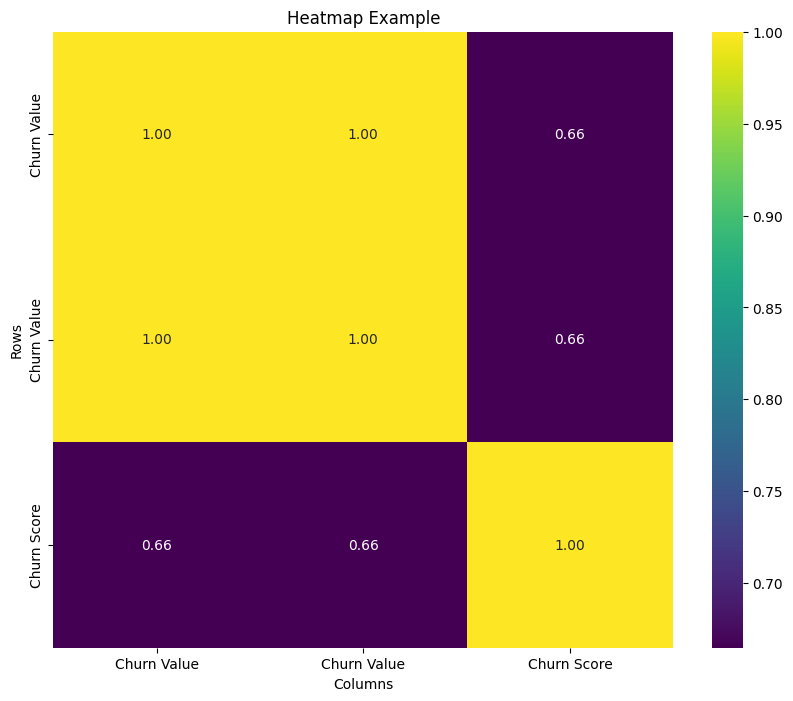

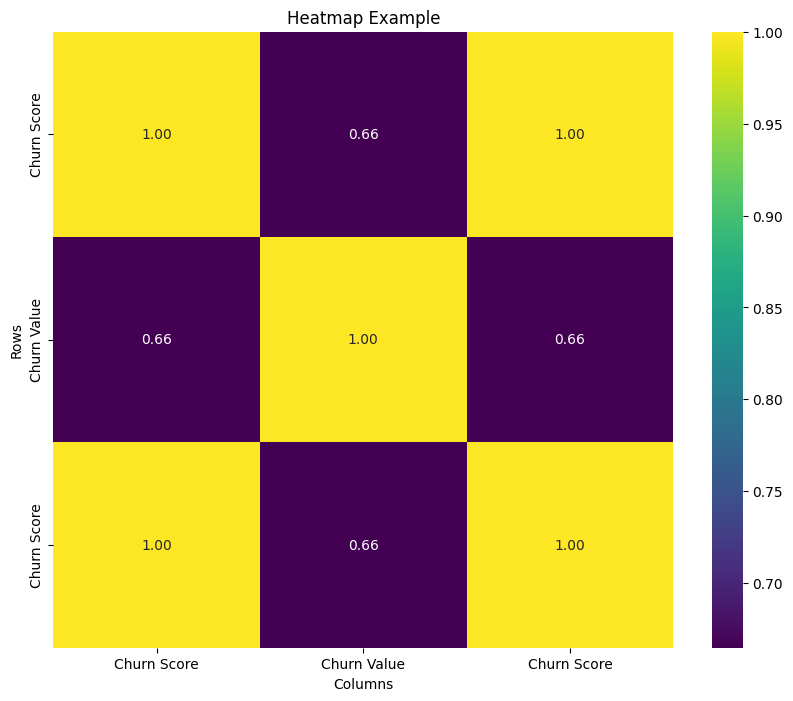

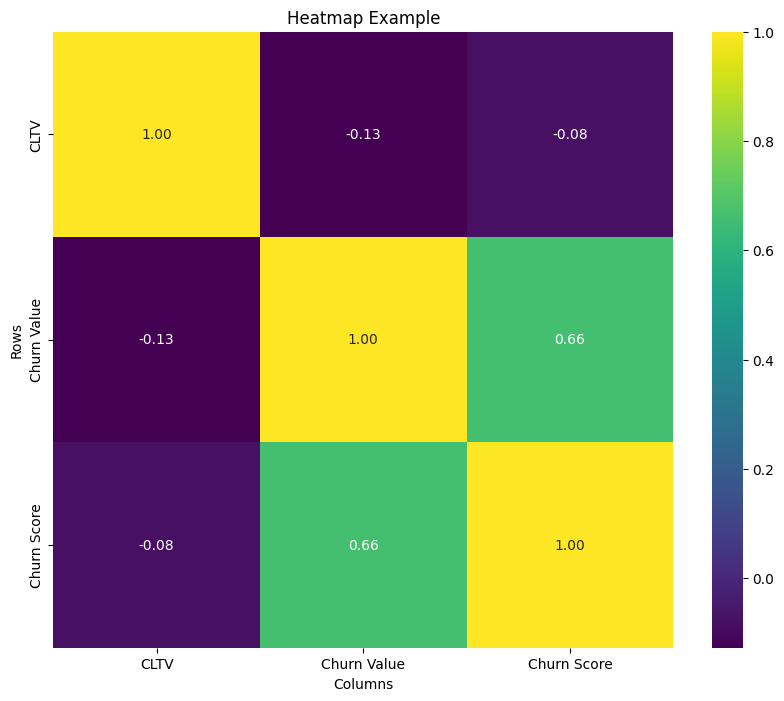

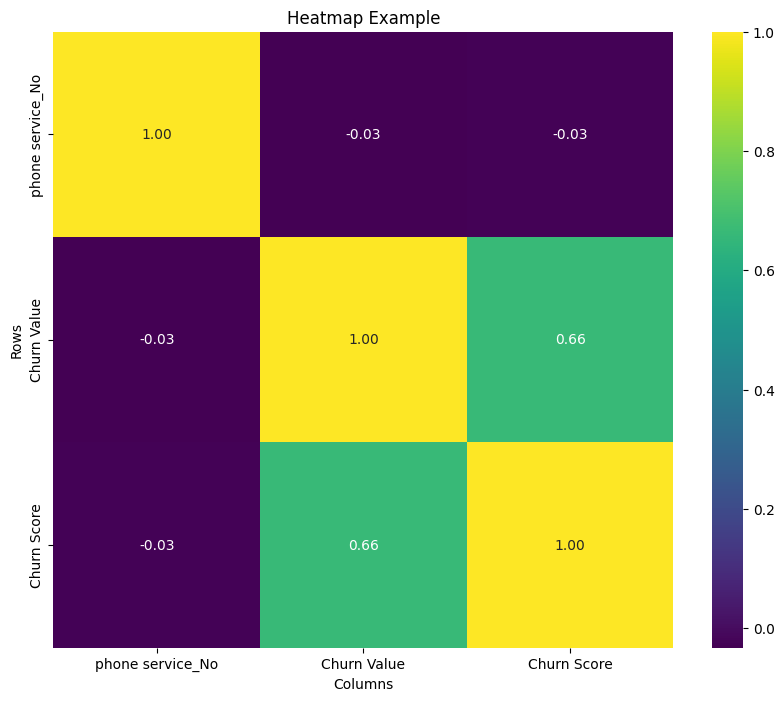

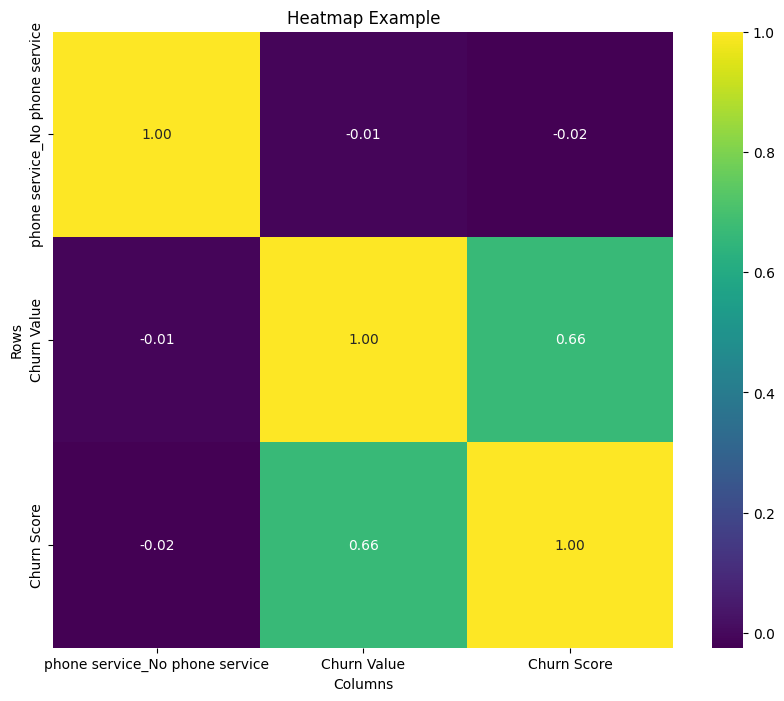

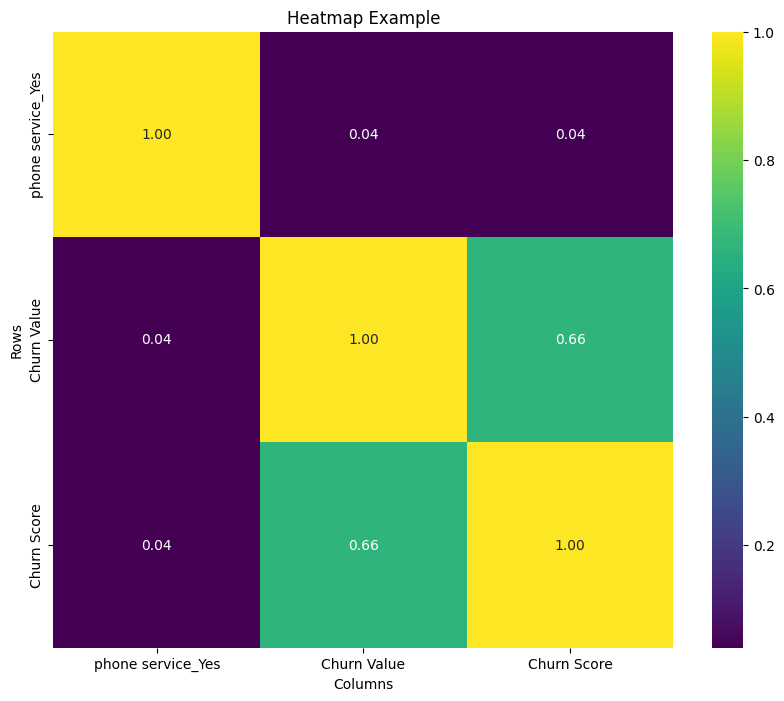

In [795]:
for col in encoded_df.columns:
    heatmap_plot(col)

In [796]:
encoded_df.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Tenure Months', 'Phone Service',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'Churn Value', 'Churn Score', 'CLTV',
       'phone service_No', 'phone service_No phone service',
       'phone service_Yes'],
      dtype='object')

In [797]:
X,y = encoded_df.drop(['Churn Value','Churn Score'],axis=1),encoded_df['Churn Value']

In [798]:
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [799]:
class LogTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, offset=1):
        self.offset = offset

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        return np.log(X + self.offset)

In [800]:
pipeline = Pipeline([
    ('log_transform', LogTransformer()),
    ('scaler', RobustScaler())
])


In [ ]:
scale_cols

['Total Charges', 'Monthly Charges', 'CLTV']

In [802]:
X.iloc[0]

Gender                               1.000000
Senior Citizen                       0.000000
Partner                              0.000000
Tenure Months                        2.000000
Phone Service                        1.000000
Internet Service                     0.189747
Online Security                      0.146407
Online Backup                        0.215418
Device Protection                    0.391073
Tech Support                         0.416138
Streaming TV                         0.335107
Streaming Movies                     0.336676
Contract                             0.426888
Paperless Billing                    1.000000
Payment Method                       0.191297
Monthly Charges                     53.850000
Total Charges                      108.150000
CLTV                              3239.000000
phone service_No                     1.000000
phone service_No phone service       0.000000
phone service_Yes                    0.000000
Name: 0, dtype: float64

In [803]:
X[scale_cols] = pipeline.fit_transform(X[scale_cols])

In [804]:
scale_cols

['Total Charges', 'Monthly Charges', 'CLTV']

In [805]:
X.iloc[0].values

array([ 1.        ,  0.        ,  0.        ,  2.        ,  1.        ,
        0.18974726,  0.14640655,  0.21541777,  0.39107318,  0.41613768,
        0.33510723,  0.33667629,  0.42688836,  1.        ,  0.19129675,
       -0.28840429, -1.13858142, -0.76275625,  1.        ,  0.        ,
        0.        ])

In [806]:
y

0       1
1       1
2       1
3       1
4       1
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: Churn Value, Length: 7043, dtype: int64

In [807]:
encoded_df[encoded_df['Churn Value'] == 1]['Churn Score'].min()

65

In [808]:
encoded_df[encoded_df['Churn Value'] == 0]['Churn Score'].max()

80

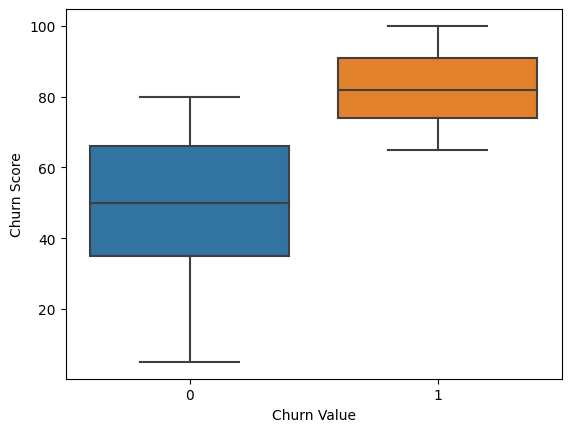

Correlation between Churn Score and Churn Value: 0.6648970311816244


In [809]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Churn Value', y='Churn Score', data=df)
plt.show()

correlation = encoded_df['Churn Score'].corr(encoded_df['Churn Value'])
print(f"Correlation between Churn Score and Churn Value: {correlation}")

In [810]:
encoded_df.iloc[2].values

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.00000000e+00,
       1.00000000e+00, 4.18680055e-01, 4.17449857e-01, 3.99071080e-01,
       2.25103770e-01, 4.16137680e-01, 3.00636744e-01, 2.99352155e-01,
       4.26888363e-01, 1.00000000e+00, 4.52458586e-01, 9.96500000e+01,
       8.20500000e+02, 1.00000000e+00, 8.60000000e+01, 5.37200000e+03,
       0.00000000e+00, 0.00000000e+00, 1.00000000e+00])

In [811]:
encoded_df['Churn Value'].value_counts()

Churn Value
0    5174
1    1869
Name: count, dtype: int64

Seems like data is unbalance. 

We can try **Informed Undersampling Using KNN**".

In [812]:
X.iloc[0]

Gender                            1.000000
Senior Citizen                    0.000000
Partner                           0.000000
Tenure Months                     2.000000
Phone Service                     1.000000
Internet Service                  0.189747
Online Security                   0.146407
Online Backup                     0.215418
Device Protection                 0.391073
Tech Support                      0.416138
Streaming TV                      0.335107
Streaming Movies                  0.336676
Contract                          0.426888
Paperless Billing                 1.000000
Payment Method                    0.191297
Monthly Charges                  -0.288404
Total Charges                    -1.138581
CLTV                             -0.762756
phone service_No                  1.000000
phone service_No phone service    0.000000
phone service_Yes                 0.000000
Name: 0, dtype: float64

In [813]:
majority_class = X[y== 0]
minority_class = X[y== 1]

In [814]:
y_majority = y[y==0]
y_minority = y[y==1]

In [815]:
len(majority_class)

5174

In [816]:
len(minority_class)

1869

In [817]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

In [818]:
k = 5
nn = NearestNeighbors(n_neighbors=k)
nn.fit(majority_class)

distances, indices = nn.kneighbors(majority_class)

In [819]:
avg_distances = np.mean(distances, axis=1)

threshold = np.percentile(avg_distances, 50)

avg_distances,threshold

(array([0.90220273, 0.92052269, 1.1621872 , ..., 0.25105245, 1.0004529 ,
        0.7426808 ]),
 0.7706713495052109)

In [820]:
np.percentile(avg_distances, 25),np.percentile(avg_distances, 0),np.percentile(avg_distances, 1),np.percentile(avg_distances, 10),np.percentile(avg_distances, 20),np.percentile(avg_distances, 25),np.percentile(avg_distances, 50),np.percentile(avg_distances, 75),np.percentile(avg_distances, 100)

(0.5586048142535649,
 0.04097223626501158,
 0.08603948981320228,
 0.32680852158235646,
 0.48975301247043646,
 0.5586048142535649,
 0.7706713495052109,
 0.9215256680090784,
 1.6634024890234482)

In [821]:
keep_indices = np.where(avg_distances > threshold)[0]

In [822]:
len(keep_indices)

2587

In [823]:
X_majority_reduced = majority_class.iloc[keep_indices]
y_majority_reduced = y_majority.iloc[keep_indices]

In [824]:
X_majority_reduced

,Gender,Senior Citizen,Partner,Tenure Months,Phone Service,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,phone service_No,phone service_No phone service,phone service_Yes
1869,0,0,1,1,0,0.189747,0.417450,0.215418,0.391073,0.416138,...,0.336676,0.426888,1,0.452459,-0.919468,-1.702684,-0.302577,0,1,0
1870,1,0,0,34,1,0.189747,0.146407,0.399071,0.225104,0.416138,...,0.336676,0.113212,0,0.191297,-0.228114,0.134580,-0.624931,1,0,0
1871,1,0,0,45,0,0.189747,0.146407,0.399071,0.225104,0.151941,...,0.336676,0.113212,0,0.167416,-0.547698,0.122917,-0.113503,0,1,0
1873,0,0,0,10,0,0.189747,0.146407,0.399071,0.391073,0.416138,...,0.336676,0.426888,0,0.191297,-0.923028,-0.682919,-1.846250,0,1,0
1874,1,0,0,62,1,0.189747,0.146407,0.215418,0.391073,0.416138,...,0.336676,0.113212,0,0.167416,-0.243358,0.408134,0.001006,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7035,1,0,0,38,1,0.418680,0.417450,0.399071,0.391073,0.416138,...,0.336676,0.426888,1,0.152801,-0.013143,0.281329,0.031985,1,0,0
7036,1,0,0,19,1,0.418680,0.417450,0.399071,0.391073,0.416138,...,0.336676,0.426888,1,0.167416,0.121365,0.030125,-1.385759,1,0,0
7037,0,0,0,12,0,0.189747,0.417450,0.215418,0.225104,0.151941,...,0.299352,0.113212,0,0.452459,-0.160242,-0.281560,-0.435100,0,1,0
7039,1,0,1,24,1,0.189747,0.146407,0.399071,0.225104,0.151941,...,0.299352,0.113212,1,0.191297,0.202239,0.157816,-1.706896,0,0,1


In [825]:
X_reduced = pd.concat([X_majority_reduced,minority_class])

In [826]:
X_reduced

,Gender,Senior Citizen,Partner,Tenure Months,Phone Service,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,phone service_No,phone service_No phone service,phone service_Yes
1869,0,0,1,1,0,0.189747,0.417450,0.215418,0.391073,0.416138,...,0.336676,0.426888,1,0.452459,-0.919468,-1.702684,-0.302577,0,1,0
1870,1,0,0,34,1,0.189747,0.146407,0.399071,0.225104,0.416138,...,0.336676,0.113212,0,0.191297,-0.228114,0.134580,-0.624931,1,0,0
1871,1,0,0,45,0,0.189747,0.146407,0.399071,0.225104,0.151941,...,0.336676,0.113212,0,0.167416,-0.547698,0.122917,-0.113503,0,1,0
1873,0,0,0,10,0,0.189747,0.146407,0.399071,0.391073,0.416138,...,0.336676,0.426888,0,0.191297,-0.923028,-0.682919,-1.846250,0,1,0
1874,1,0,0,62,1,0.189747,0.146407,0.215418,0.391073,0.416138,...,0.336676,0.113212,0,0.167416,-0.243358,0.408134,0.001006,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1864,1,0,0,12,1,0.189747,0.417450,0.399071,0.391073,0.151941,...,0.336676,0.113212,1,0.452459,-0.175467,-0.290955,0.027017,1,0,0
1865,0,0,0,9,1,0.189747,0.417450,0.399071,0.391073,0.416138,...,0.336676,0.426888,1,0.167416,-0.500605,-0.553956,-1.828217,1,0,0
1866,1,1,0,1,1,0.418680,0.417450,0.399071,0.391073,0.416138,...,0.336676,0.426888,1,0.452459,0.080005,-1.295801,0.472807,0,0,1
1867,0,0,0,67,1,0.418680,0.146407,0.215418,0.225104,0.416138,...,0.336676,0.426888,1,0.152801,0.412670,0.711739,0.492760,0,0,1


In [827]:
y_reduced = pd.concat([y_majority_reduced,y_minority])

In [828]:
y_reduced

1869    0
1870    0
1871    0
1873    0
1874    0
       ..
1864    1
1865    1
1866    1
1867    1
1868    1
Name: Churn Value, Length: 4456, dtype: int64

In [829]:
y_reduced.value_counts()

Churn Value
0    2587
1    1869
Name: count, dtype: int64

In [830]:
y_reduced.value_counts(normalize=True) * 100

Churn Value
0    58.056553
1    41.943447
Name: proportion, dtype: float64

In [831]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_reduced,y_reduced,random_state=42,test_size=0.2)

In [832]:
X_train

,Gender,Senior Citizen,Partner,Tenure Months,Phone Service,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,phone service_No,phone service_No phone service,phone service_Yes
6167,1,1,1,7,1,0.418680,0.417450,0.399071,0.391073,0.416138,...,0.336676,0.426888,1,0.452459,0.074992,-0.429755,-0.564820,0,0,1
2071,0,1,0,19,1,0.418680,0.146407,0.215418,0.391073,0.151941,...,0.299352,0.426888,1,0.191297,0.434086,0.161555,-0.570631,1,0,0
1848,1,0,0,4,1,0.418680,0.417450,0.399071,0.391073,0.416138,...,0.336676,0.426888,1,0.452459,0.059817,-0.740327,-0.508139,0,0,1
292,0,0,0,19,0,0.189747,0.417450,0.399071,0.391073,0.416138,...,0.299352,0.113212,1,0.152801,-0.484947,-0.199472,0.307885,0,1,0
1868,1,1,1,4,1,0.418680,0.417450,0.399071,0.391073,0.416138,...,0.336676,0.426888,1,0.191297,0.060544,-0.676046,0.579861,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1839,0,0,1,1,0,0.189747,0.146407,0.399071,0.391073,0.416138,...,0.336676,0.426888,0,0.167416,-0.896603,-1.693376,0.303043,0,1,0
2777,1,0,1,61,1,0.189747,0.146407,0.399071,0.225104,0.151941,...,0.299352,0.029016,0,0.152801,0.074274,0.544022,0.812265,0,0,1
505,0,0,0,3,1,0.418680,0.146407,0.215418,0.391073,0.416138,...,0.336676,0.426888,1,0.452459,0.126855,-0.773095,0.375890,1,0,0
1185,1,0,1,1,1,0.074675,0.074675,0.074675,0.074675,0.074675,...,0.074675,0.426888,0,0.167416,-1.343856,-1.875452,0.161718,1,0,0


In [833]:
X_test

,Gender,Senior Citizen,Partner,Tenure Months,Phone Service,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,...,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,CLTV,phone service_No,phone service_No phone service,phone service_Yes
4875,0,0,1,29,1,0.074675,0.074675,0.074675,0.074675,0.074675,...,0.074675,0.029016,0,0.191297,-1.061593,-0.313088,-1.071886,0,0,1
5948,0,1,0,21,1,0.418680,0.417450,0.399071,0.391073,0.416138,...,0.299352,0.426888,1,0.167416,0.329981,0.165505,0.521365,0,0,1
3061,1,0,1,53,1,0.074675,0.074675,0.074675,0.074675,0.074675,...,0.074675,0.029016,1,0.191297,-1.373030,-0.102593,-0.015149,1,0,0
3845,0,1,0,4,1,0.074675,0.074675,0.074675,0.074675,0.074675,...,0.074675,0.426888,0,0.191297,-1.338634,-1.212713,-0.612386,1,0,0
3492,1,1,0,34,1,0.418680,0.417450,0.215418,0.225104,0.416138,...,0.299352,0.113212,1,0.452459,0.379469,0.389211,0.495191,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,1,0,1,44,1,0.074675,0.074675,0.074675,0.074675,0.074675,...,0.074675,0.113212,0,0.452459,-1.113378,-0.143254,0.372474,0,0,1
5669,0,0,1,55,1,0.074675,0.074675,0.074675,0.074675,0.074675,...,0.074675,0.029016,1,0.152801,-1.079955,-0.003035,-0.030909,0,0,1
5013,1,0,0,57,1,0.189747,0.417450,0.215418,0.391073,0.151941,...,0.336676,0.113212,1,0.191297,-0.272525,0.360479,-0.158377,1,0,0
5575,1,0,1,6,1,0.418680,0.417450,0.399071,0.391073,0.416138,...,0.336676,0.426888,1,0.452459,-0.008486,-0.583036,-1.219123,1,0,0


In [834]:
from sklearn.linear_model import LogisticRegression, Ridge, Lasso

In [835]:
lr = LogisticRegression(max_iter=500)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
lr.score(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7803030303030303

In [836]:
lr.score(X_test,y_test)

0.757847533632287

In [837]:
from sklearn.metrics import accuracy_score

In [838]:
accuracy_score(y_pred,y_test)

0.757847533632287

In [839]:
lr.coef_ < -0.5

array([[False, False, False, False, False, False, False, False, False,
        False,  True,  True, False, False, False, False,  True, False,
        False, False, False]])

In [840]:
lr.coef_[0] > 0.5

array([False, False, False, False, False,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True, False, False,
       False, False, False])

In [841]:
(lr.coef_[0] > 0.5) | (lr.coef_ < -0.5)

array([[False, False, False, False, False,  True,  True, False, False,
         True,  True,  True,  True,  True,  True,  True,  True, False,
        False, False, False]])

In [842]:
len(lr.coef_[0])

21

In [843]:
X_train.columns

Index(['Gender', 'Senior Citizen', 'Partner', 'Tenure Months', 'Phone Service',
       'Internet Service', 'Online Security', 'Online Backup',
       'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies',
       'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges',
       'Total Charges', 'CLTV', 'phone service_No',
       'phone service_No phone service', 'phone service_Yes'],
      dtype='object')

In [844]:
selected_df = X_train[X_train.columns[(lr.coef_[0] > 0.5) | (lr.coef_ < -0.5)[0]]]

In [ ]:
lr.coef_

array([[ 0.01266917, -0.31716927, -0.05842832,  0.03041543, -0.07723189,
         2.16754888,  0.67239686,  0.30952426, -0.18749009,  1.27499681,
        -1.68074516, -1.77540187,  2.13119585,  0.68238171,  1.02830692,
         2.11890299, -2.93752063,  0.17212333, -0.13086234, -0.06317431,
         0.05363045]])

In [846]:
lr.intercept_

array([-2.7254551])

In [847]:
X_train.columns[(lr.coef_[0] > 0.5) | (lr.coef_ < -0.5)[0]]

Index(['Internet Service', 'Online Security', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges'],
      dtype='object')

In [848]:
selecte_test = X_test[X_train.columns[(lr.coef_[0] > 0.5) | (lr.coef_ < -0.5)[0]]]

In [849]:
lr = LogisticRegression(max_iter=500)
lr.fit(selected_df,y_train)
y_pred = lr.predict(selecte_test)
lr.score(selected_df,y_train)

0.7727272727272727

In [850]:
accuracy_score(y_pred,y_test)

0.7612107623318386

In [851]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
def train_models(X_train, y_train):
    """Train multiple classification models and return a dictionary of trained models."""
    models = {
        "Logistic Regression": LogisticRegression(max_iter=500),
        "Random Forest": RandomForestClassifier(n_estimators=100),
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(),
        "KNN": KNeighborsClassifier(n_neighbors=5),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss")
    }

    trained_models = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        trained_models[name] = model

    return trained_models


In [853]:
def evaluate_models(models, X_test, y_test):
    """Evaluate trained models and print their performance metrics."""
    for name, model in models.items():
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        confussion_matrix  = confusion_matrix(y_test, y_pred)
        print(f"Model: {name}")
        print(f"  Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1 Score: {f1:.4f}")
        print(f"  Confussion Matrix: {confussion_matrix}\n")

In [854]:
trained_models = train_models(X_train, y_train)
evaluate_models(trained_models, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Logistic Regression
  Accuracy: 0.7578
  Precision: 0.7566
  Recall: 0.7578
  F1 Score: 0.7570
  Confussion Matrix:
 [[432 101]
 [115 244]]

Model: Random Forest
  Accuracy: 0.7668
  Precision: 0.7668
  Recall: 0.7668
  F1 Score: 0.7668
  Confussion Matrix:
 [[429 104]
 [104 255]]

Model: SVM
  Accuracy: 0.6996
  Precision: 0.6947
  Recall: 0.6996
  F1 Score: 0.6918
  Confussion Matrix:
 [[437  96]
 [172 187]]

Model: Decision Tree
  Accuracy: 0.6839
  Precision: 0.6905
  Recall: 0.6839
  F1 Score: 0.6860
  Confussion Matrix:
 [[373 160]
 [122 237]]

Model: KNN
  Accuracy: 0.7209
  Precision: 0.7250
  Recall: 0.7209
  F1 Score: 0.7223
  Confussion Matrix:
 [[395 138]
 [111 248]]

Model: Gradient Boosting
  Accuracy: 0.7747
  Precision: 0.7760
  Recall: 0.7747
  F1 Score: 0.7752
  Confussion Matrix:
 [[427 106]
 [ 95 264]]

Model: XGBoost
  Accuracy: 0.7567
  Precision: 0.7599
  Recall: 0.7567
  F1 Score: 0.7578
  Confussion Matrix:
 [[413 120]
 [ 97 262]]



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

def hyperparameter_tune_models(X_train, y_train, cv=5, scoring='accuracy'):
    """
    Hyperparameter tune multiple classification algorithms using GridSearchCV.

    Parameters:
        X_train (array-like): Training feature data.
        y_train (array-like): Training target labels.
        cv (int): Number of cross-validation folds.
        scoring (str): Scoring metric for GridSearchCV.

    Returns:
        best_models (dict): A dictionary mapping model names to the best estimator found.
    """

    models = {
        "Logistic Regression": LogisticRegression(max_iter=500,random_state=42),
        "Random Forest": RandomForestClassifier(random_state=42),
        "SVM": SVC(),
        "Decision Tree": DecisionTreeClassifier(random_state=42),
        "KNN": KNeighborsClassifier(),
        "Gradient Boosting": GradientBoostingClassifier(random_state=42),
        "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric="logloss",random_state=42)
    }

    param_grids = {
        "Logistic Regression": {
            'C': [0.1, 1, 10],
            'solver': ['lbfgs', 'liblinear']
        },
        "Random Forest": {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20]
        },
        "SVM": {
            'C': [0.1, 1, 10],
            'kernel': ['rbf', 'linear']
        },
        "Decision Tree": {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        },
        "KNN": {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        },
        "Gradient Boosting": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        },
        "XGBoost": {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    }
    best_models = {}
    for name, model in models.items():
        print(f"Tuning hyperparameters for {name}...")
        grid = GridSearchCV(model, param_grids[name], cv=cv, scoring=scoring, n_jobs=-1)
        grid.fit(X_train, y_train)
        best_models[name] = {
            "estimator": grid.best_estimator_,
            "score": grid.best_score_,
            "params": grid.best_params_
        }
        print(f"Best parameters for {name}: {grid.best_params_}")
        print(f"Best {scoring} score for {name}: {grid.best_score_}\n")
    return best_models
best_models = hyperparameter_tune_models(X_train, y_train)

Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}
Best accuracy score for Logistic Regression: 0.7760901082622877

Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': None, 'n_estimators': 200}
Best accuracy score for Random Forest: 0.7811435302645886

Tuning hyperparameters for SVM...
Best parameters for SVM: {'C': 10, 'kernel': 'linear'}
Best accuracy score for SVM: 0.7744062908741353

Tuning hyperparameters for Decision Tree...
Best parameters for Decision Tree: {'max_depth': 10, 'min_samples_split': 10}
Best accuracy score for Decision Tree: 0.7362572293048836

Tuning hyperparameters for KNN...
Best parameters for KNN: {'n_neighbors': 9, 'weights': 'uniform'}
Best accuracy score for KNN: 0.7387794096789952

Tuning hyperparameters for Gradient Boosting...
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best accuracy scor

In [856]:
display(best_models)

{'Logistic Regression': {'estimator': LogisticRegression(C=10, max_iter=500, random_state=42, solver='liblinear'),
  'score': 0.7760901082622877,
  'params': {'C': 10, 'solver': 'liblinear'}},
 'Random Forest': {'estimator': RandomForestClassifier(n_estimators=200, random_state=42),
  'score': 0.7811435302645886,
  'params': {'max_depth': None, 'n_estimators': 200}},
 'SVM': {'estimator': SVC(C=10, kernel='linear'),
  'score': 0.7744062908741353,
  'params': {'C': 10, 'kernel': 'linear'}},
 'Decision Tree': {'estimator': DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42),
  'score': 0.7362572293048836,
  'params': {'max_depth': 10, 'min_samples_split': 10}},
 'KNN': {'estimator': KNeighborsClassifier(n_neighbors=9),
  'score': 0.7387794096789952,
  'params': {'n_neighbors': 9, 'weights': 'uniform'}},
 'Gradient Boosting': {'estimator': GradientBoostingClassifier(learning_rate=0.2, n_estimators=50, random_state=42),
  'score': 0.7825436910033565,
  'params': {'l

In [857]:
for key in best_models.keys():
    model_dct = best_models[key]
    model = model_dct['estimator']
    model.fit(X_train, y_train)
    trained_models[key] = model

evaluate_models(trained_models, X_test, y_test)

Model: Logistic Regression
  Accuracy: 0.7556
  Precision: 0.7546
  Recall: 0.7556
  F1 Score: 0.7550
  Confussion Matrix:
 [[429 104]
 [114 245]]

Model: Random Forest
  Accuracy: 0.7567
  Precision: 0.7562
  Recall: 0.7567
  F1 Score: 0.7564
  Confussion Matrix:
 [[427 106]
 [111 248]]

Model: SVM
  Accuracy: 0.7612
  Precision: 0.7613
  Recall: 0.7612
  F1 Score: 0.7613
  Confussion Matrix:
 [[426 107]
 [106 253]]

Model: Decision Tree
  Accuracy: 0.7265
  Precision: 0.7287
  Recall: 0.7265
  F1 Score: 0.7274
  Confussion Matrix:
 [[403 130]
 [114 245]]

Model: KNN
  Accuracy: 0.7332
  Precision: 0.7371
  Recall: 0.7332
  F1 Score: 0.7345
  Confussion Matrix:
 [[401 132]
 [106 253]]

Model: Gradient Boosting
  Accuracy: 0.7735
  Precision: 0.7735
  Recall: 0.7735
  F1 Score: 0.7735
  Confussion Matrix:
 [[432 101]
 [101 258]]

Model: XGBoost
  Accuracy: 0.7657
  Precision: 0.7685
  Recall: 0.7657
  F1 Score: 0.7667
  Confussion Matrix:
 [[418 115]
 [ 94 265]]



Our aim to reduce false negative, ie., if a customer is going to churn(1) we must classify them, so that we need to reduce false negative. Here Gradient boost and logistic regression works best for it. We can go with logistic regression, because of simplicity and less false negative.

In [858]:
y_test.value_counts()

Churn Value
0    533
1    359
Name: count, dtype: int64

In [859]:
best_models

{'Logistic Regression': {'estimator': LogisticRegression(C=10, max_iter=500, random_state=42, solver='liblinear'),
  'score': 0.7760901082622877,
  'params': {'C': 10, 'solver': 'liblinear'}},
 'Random Forest': {'estimator': RandomForestClassifier(n_estimators=200, random_state=42),
  'score': 0.7811435302645886,
  'params': {'max_depth': None, 'n_estimators': 200}},
 'SVM': {'estimator': SVC(C=10, kernel='linear'),
  'score': 0.7744062908741353,
  'params': {'C': 10, 'kernel': 'linear'}},
 'Decision Tree': {'estimator': DecisionTreeClassifier(max_depth=10, min_samples_split=10, random_state=42),
  'score': 0.7362572293048836,
  'params': {'max_depth': 10, 'min_samples_split': 10}},
 'KNN': {'estimator': KNeighborsClassifier(n_neighbors=9),
  'score': 0.7387794096789952,
  'params': {'n_neighbors': 9, 'weights': 'uniform'}},
 'Gradient Boosting': {'estimator': GradientBoostingClassifier(learning_rate=0.2, n_estimators=50, random_state=42),
  'score': 0.7825436910033565,
  'params': {'l

In [870]:
selected_model = best_models['Logistic Regression']
logistic_regression = selected_model['estimator']

In [873]:
logistic_regression.fit(X_train,y_train)
logistic_regression.score(X_train,y_train)

0.7786195286195287

In [874]:
logistic_regression.score(X_test,y_test)

0.7556053811659192

In [875]:
y_pred = logistic_regression.predict(X_test)
accuracy_score(y_pred,y_test)

0.7556053811659192

In [876]:
confusion_matrix(y_test,y_pred)

array([[429, 104],
       [114, 245]])